Data Collection
---

In [3]:
import numpy as np #untuk mengolah tabel
import pandas as pd #untuk mengolah tabel
import matplotlib.pyplot as plt #visualisasi
from scipy import stats
from scipy.stats import norm, skew #statistics
import seaborn as sns #warna
import missingno as msno

color = sns.color_palette()
sns.set_style('darkgrid')

Import Data
---
Cek DataFrame

In [4]:
data2015 = pd.read_csv("IT Salary Survey EU 2015.csv") #membaca dataset (pastikan sudah upload file datasetnya)
data2015.head(5) # menampilkan 5 data teratas

,Отметка времени,Возраст,Пол,Город,Position,Опыт работы в Европе (сколько лет),Опыт работы в целом (сколько лет),Текущая ЗП,ЗП год назад,Какая была первая ЗП в Европе,Какая по счету у вас сейчас работа в Европе,Основной язык на работе,Размер компании,Тип компании,Level
0,30.12.2015 11:48:42,26.0,m,Berlin,PHP developer,1,5,51000.0,39000,39000.0,2.0,English,больше 100,Продуктовая,NaN
1,30.12.2015 11:56:36,31.0,m,Berlin,Senior PHP Developer,2,12,52000.0,40000,40000.0,1.0,English,10-50,Продуктовая,NaN
2,30.12.2015 11:57:37,29.0,m,Berlin,Android Developer,1,5,65000.0,55000,55000.0,2.0,English,больше 100,Продуктовая,NaN
3,30.12.2015 11:58:54,31.0,m,Berlin,Project manager,1,5,55000.0,24000,55000.0,1.0,English,больше 100,Продуктовая,NaN
4,30.12.2015 12:00:48,33.0,m,Berlin,Senior Software Engineer,16,16,75000.0,72000,65000.0,3.0,English,10-50,Стартап,NaN


In [5]:
data2016 = pd.read_csv("IT Salary Survey EU 2016.csv")
data2016.head(5)

,Отметка времени,Возраст,Пол,Город,Position,Опыт работы в Европе (сколько лет),Опыт работы в целом (сколько лет),Текущая ЗП,ЗП год назад,Какая была первая ЗП в Европе,Какая по счету у вас сейчас работа в Европе,Основной язык на работе,Размер компании,Тип компании,Уровень,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,13.12.2016 14:19:20,29.0,m,Berlin,Fullstack Ruby Developer,1,6.0,54000.0,48000.0,48000,1.0,English,50-100,Стартап,Senior,NaN,NaN,NaN,NaN,NaN
1,13.12.2016 14:21:41,31.0,m,Frankfurt,Developer,7,12.0,62000.0,62000.0,39000,1.0,Deutsch,больше 100,Агентство,Senior,NaN,NaN,NaN,NaN,NaN
2,13.12.2016 14:20:36,30.0,m,Berlin,Frontend Engineer,1,4.0,65000.0,55000.0,55000,1.0,English,больше 100,Продуктовая,Senior,NaN,NaN,NaN,NaN,NaN
3,13.12.2016 14:21:46,33.0,m,Berlin,Tech Lead,3,12.0,60000.0,55000.0,50000,2.0,English,больше 100,Продуктовая,Senior,NaN,NaN,NaN,NaN,NaN
4,13.12.2016 14:24:20,27.0,m,Berlin,Python Developer,1,5.0,54000.0,50000.0,50000,1.0,English,10-50,Стартап,Middle,NaN,NaN,NaN,NaN,NaN


In [6]:
data2017 = pd.read_csv("IT Salary Survey EU 2017.csv")
data2017.head(5)

,Отметка времени,Возраст,Пол,Город,Position,Опыт работы в Европе,Опыт работы в целом,Текущая ЗП,ЗП год назад,Какая была первая ЗП в Европе,Какая по счету у вас сейчас работа в Европе,Основной язык на работе,Размер компании,Тип компании,Уровень
0,20.12.2017 13:32:04,NaN,M,München,Software-Engineer,4.0,2.0,48000.0,47600.0,47600.0,4.0,Deutsch,100-1000,Продуктовая,Junior
1,20.12.2017 13:33:48,37.0,M,München,It support engineer,1.0,15.0,45000.0,45000.0,45000.0,1.0,English,1000+,Аутсорс (ну а вдруг),Middle
2,20.12.2017 13:36:43,32.0,F,München,Sr. QA,1.0,7.0,60000.0,56000.0,56000.0,2.0,English,1000+,Продуктовая,Senior
3,20.12.2017 13:39:27,NaN,M,München,DevOps,1.0,10.0,80000.0,65000.0,65000.0,2.0,English,50-100,Продуктовая,Senior
4,20.12.2017 13:41:02,39.0,M,München,Java Developer,1.0,17.0,75000.0,75000.0,72000.0,1.0,English,100-1000,Продуктовая,Senior


In [7]:
data2018 = pd.read_csv("IT Salary Survey EU 2018.csv")
data2018.head(5)

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [8]:
data2019 = pd.read_csv("IT Salary Survey EU 2019.csv")
data2019.head(5)

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [9]:
data2020 = pd.read_csv("IT Salary Survey EU 2020.csv")
data2020.head(5)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


Cek Shape DataFrame
---

In [10]:
print(data2015.shape)
print(data2016.shape)
print(data2017.shape)
print(data2018.shape)
print(data2019.shape)
print(data2020.shape)

(210, 15)
(376, 20)
(327, 15)
(765, 14)
(991, 23)
(1253, 23)


Menentukan Kolom yang dipakai
---
Year : Tahun Data Diambil
--
Age : Usia
--
Gender : Gender
--
City : Kota tempat kerja
--
Position : Jenis Pekerjaan (IT)
--
Exp : Pengalaman (Tahun)
--
Seniority : Senioritas
--
Salary : Pendapatan tahun itu (Euro)
--
Language : Bahasa utama
--
CPSize : Ukuran Perusahaan
--
CPType : Tipe Perusahaan
--
---------------------------------------------


Merapihkan DataFrame
---
------------------------------------

In [11]:
col = np.array(["Year","Age","Gender","City","Position","Experience","Seniority","Salary","Language","CPSize","CPType","StockOp"])
Y_15 = np.full((210,1), 2015)
Yr_15 = pd.DataFrame(Y_15,columns=["Year"])
Year_15 = Yr_15["Year"]
Y_16 = np.full((376,1), 2016)
Yr_16 = pd.DataFrame(Y_16,columns=["Year"])
Year_16 = Yr_16["Year"]
Y_17 = np.full((327,1), 2017)
Yr_17 = pd.DataFrame(Y_17,columns=["Year"])
Year_17 = Yr_17["Year"]
Y_18 = np.full((765,1), 2018)
Yr_18 = pd.DataFrame(Y_18,columns=["Year"])
Year_18 = Yr_18["Year"]
Y_19 = np.full((991,1), 2019)
Yr_19 = pd.DataFrame(Y_19,columns=["Year"])
Year_19 = Yr_19["Year"]
Y_20 = np.full((1253,1), 2020)
Yr_20 = pd.DataFrame(Y_20,columns=["Year"])
Year_20 = Yr_20["Year"]

2015
---

In [12]:
Age_15 = data2015["Возраст"]
Gender_15 = data2015["Пол"]
City_15 = data2015["Город"]
Position_15 = data2015["Position"]
Exp_15 = data2015["Опыт работы в целом (сколько лет)"]
Seniority_15 = data2015["Level"]
Salary_15 = data2015["Текущая ЗП"]
Language_15 = data2015["Основной язык на работе"]
CPSize_15 = data2015["Размер компании"]
CPType_15 = data2015["Тип компании"]

Gender_15 = np.where(Gender_15 == "m","Male",Gender_15)
Gender_15 = np.where(Gender_15 == "f","Female",Gender_15)

City_15 = np.where(City_15 == "Munchen","Munich",City_15)
City_15 = np.where(City_15 == "München","Munich",City_15)
City_15 = np.where(City_15 == "munich","Munich",City_15)

CPType_15 = np.where(CPType_15 == "Продуктовая","Product",CPType_15)
CPType_15 = np.where(CPType_15 == "Стартап","Startup",CPType_15)
CPType_15 = np.where(CPType_15 == "Агентство","Consulting / Agency",CPType_15)
CPType_15 = np.where(CPType_15 == "Другое","Other",CPType_15)
CPType_15 = np.where(CPType_15 == "Аутсорс (ну а вдруг)","Outsourcing",CPType_15)

d15 = {'Year':Year_15,'Age':Age_15,'Gender':Gender_15,'City':City_15,'Position':Position_15,'Experience':Exp_15,'Seniority':Seniority_15
       ,'Salary':Salary_15,'Language':Language_15,'CPSize':CPSize_15,'CPType':CPType_15}
data15 = pd.DataFrame(data=d15)
data15

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2015,26.0,Male,Berlin,PHP developer,5,NaN,51000.0,English,больше 100,Product
1,2015,31.0,Male,Berlin,Senior PHP Developer,12,NaN,52000.0,English,10-50,Product
2,2015,29.0,Male,Berlin,Android Developer,5,NaN,65000.0,English,больше 100,Product
3,2015,31.0,Male,Berlin,Project manager,5,NaN,55000.0,English,больше 100,Product
4,2015,33.0,Male,Berlin,Senior Software Engineer,16,NaN,75000.0,English,10-50,Startup
...,...,...,...,...,...,...,...,...,...,...,...
205,2015,44.0,Male,Munich,Software Engineer,25,NaN,90000.0,English,больше 100,Product
206,2015,29.0,Male,Hamburg,Senior Java Developer,10,NaN,65000.0,English,50-100,Product
207,2015,32.0,Female,Berlin,UI Designer,6,NaN,45000.0,English,50-100,Product
208,2015,32.0,Female,Berlin,UI Designer,6,NaN,45000.0,English,50-100,Product


In [13]:
CPSize_15 = np.array(CPSize_15)
CPSize_15

array(['больше 100', '10-50', 'больше 100', 'больше 100', '10-50',
       'больше 100', 'до 10 сотрудников', 'больше 100', '10-50',
       'больше 100', 'больше 100', 'больше 100', '50-100', 'больше 100',
       '50-100', 'больше 100', '10-50', '10-50', 'больше 100', '10-50',
       '50-100', 'больше 100', 'больше 100', 'больше 100', '50-100',
       '10-50', '10-50', 'больше 100', '50-100', 'больше 100', '50-100',
       'до 10 сотрудников', '10-50', '50-100', 'больше 100', '10-50',
       'больше 100', '50-100', 'больше 100', 'больше 100', 'больше 100',
       '10-50', 'больше 100', 'больше 100', '50-100', '10-50',
       'больше 100', '10-50', 'больше 100', '10-50', '10-50', '10-50',
       'больше 100', 'больше 100', nan, 'больше 100', 'больше 100',
       'больше 100', '50-100', 'больше 100', '10-50', '50-100',
       'до 10 сотрудников', 'больше 100', 'больше 100', 'больше 100',
       'больше 100', '50-100', 'больше 100', 'больше 100', 'больше 100',
       'больше 100', '10-50',

2016
---

In [14]:
Age_16 = data2016["Возраст"]
Gender_16 = data2016["Пол"]
City_16 = data2016["Город"]
Position_16 = data2016["Position"]
Exp_16 = data2016["Опыт работы в целом (сколько лет)"]
Seniority_16 = data2016["Уровень"]
Salary_16 = data2016["Текущая ЗП"]
Language_16 = data2016["Основной язык на работе"]
CPSize_16 = data2016["Размер компании"]
CPType_16 = data2016["Тип компании"]

Gender_16 = np.where(Gender_16 == "m","Male",Gender_16)
Gender_16 = np.where(Gender_16 == "f","Female",Gender_16)

City_16 = np.where(City_16 == "Munchen","Munich",City_16)
City_16 = np.where(City_16 == "München","Munich",City_16)
City_16 = np.where(City_16 == "munich","Munich",City_16)

CPType_16 = np.where(CPType_16 == "Продуктовая","Product",CPType_16)
CPType_16 = np.where(CPType_16 == "Стартап","Startup",CPType_16)
CPType_16 = np.where(CPType_16 == "Агентство","Consulting / Agency",CPType_16)
CPType_16 = np.where(CPType_16 == "Другое","Other",CPType_16)
CPType_16 = np.where(CPType_16 == "Аутсорс (ну а вдруг)","Outsourcing",CPType_16)

d16 = {'Year':Year_16,'Age':Age_16,'Gender':Gender_16,'City':City_16,'Position':Position_16,'Experience':Exp_16,'Seniority':Seniority_16
       ,'Salary':Salary_16,'Language':Language_16,'CPSize':CPSize_16,'CPType':CPType_16}
data16 = pd.DataFrame(data=d16)
data16

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2016,29.0,Male,Berlin,Fullstack Ruby Developer,6.0,Senior,54000.0,English,50-100,Startup
1,2016,31.0,Male,Frankfurt,Developer,12.0,Senior,62000.0,Deutsch,больше 100,Consulting / Agency
2,2016,30.0,Male,Berlin,Frontend Engineer,4.0,Senior,65000.0,English,больше 100,Product
3,2016,33.0,Male,Berlin,Tech Lead,12.0,Senior,60000.0,English,больше 100,Product
4,2016,27.0,Male,Berlin,Python Developer,5.0,Middle,54000.0,English,10-50,Startup
...,...,...,...,...,...,...,...,...,...,...,...
371,2016,33.0,Male,Rosenheim,Magento Developer,4.0,Senior,65000.0,Deutsch,50-100,Consulting / Agency
372,2016,32.0,Male,Франкфурт,Java Developer,10.0,Middle,61000.0,Deutsch,больше 100,Consulting / Agency
373,2016,34.0,Male,Munich,c++ developer,11.0,Senior,74000.0,English,больше 100,Outsourcing
374,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2017
---

In [15]:
Age_17 = data2017["Возраст"]
Gender_17 = data2017["Пол"]
City_17 = data2017["Город"]
Position_17 = data2017["Position"]
Exp_17 = data2017["Опыт работы в целом"]
Seniority_17 = data2017["Уровень"]
Salary_17 = data2017["Текущая ЗП"]
Language_17 = data2017["Основной язык на работе"]
CPSize_17 = data2017["Размер компании"]
CPType_17 = data2017["Тип компании"]

Gender_17 = np.where(Gender_17 == "M","Male",Gender_17)
Gender_17 = np.where(Gender_17 == "F","Female",Gender_17)

City_17 = np.where(City_17 == "Munchen","Munich",City_17)
City_17 = np.where(City_17 == "München","Munich",City_17)
City_17 = np.where(City_17 == "munich","Munich",City_17)

CPType_17 = np.where(CPType_17 == "Продуктовая","Product",CPType_17)
CPType_17 = np.where(CPType_17 == "Стартап","Startup",CPType_17)
CPType_17 = np.where(CPType_17 == "Агентство","Consulting / Agency",CPType_17)
CPType_17 = np.where(CPType_17 == "Другое","Other",CPType_17)
CPType_17 = np.where(CPType_17 == "Аутсорс (ну а вдруг)","Outsourcing",CPType_17)

d17 = {'Year':Year_17,'Age':Age_17,'Gender':Gender_17,'City':City_17,'Position':Position_17,'Experience':Exp_17,'Seniority':Seniority_17
       ,'Salary':Salary_17,'Language':Language_17,'CPSize':CPSize_17,'CPType':CPType_17}
data17 = pd.DataFrame(data=d17)
data17

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2017,NaN,Male,Munich,Software-Engineer,2.0,Junior,48000.0,Deutsch,100-1000,Product
1,2017,37.0,Male,Munich,It support engineer,15.0,Middle,45000.0,English,1000+,Outsourcing
2,2017,32.0,Female,Munich,Sr. QA,7.0,Senior,60000.0,English,1000+,Product
3,2017,NaN,Male,Munich,DevOps,10.0,Senior,80000.0,English,50-100,Product
4,2017,39.0,Male,Munich,Java Developer,17.0,Senior,75000.0,English,100-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...
322,2017,28.0,Female,Berlin,Android Developer,8.0,Middle,67650.0,English,100-1000,Product
323,2017,NaN,Female,Munich,BA,11.0,Senior,68000.0,English,1000+,Product
324,2017,NaN,Male,Berlin,NaN,NaN,Senior,50000.0,English,1000+,Product
325,2017,NaN,Male,Bodensee,Software Developer,13.0,Senior,72000.0,Deutsch,10-50,Product


2018
---

In [16]:
Age_18 = data2018["Age"]
Gender_18 = data2018["Gender"]
City_18 = data2018["City"]
Position_18 = data2018["Position"]
Exp_18 = data2018["Years of experience"]
Seniority_18 = data2018["Your level"]
Salary_18 = data2018["Current Salary"]
Language_18 = data2018["Main language at work"]
CPSize_18 = data2018["Company size"]
CPType_18 = data2018["Company type"]

Gender_18 = np.where(Gender_18 == "M","Male",Gender_18)
Gender_18 = np.where(Gender_18 == "F","Female",Gender_18)

City_18 = np.where(City_18 == "Munchen","Munich",City_18)
City_18 = np.where(City_18 == "München","Munich",City_18)
City_18 = np.where(City_18 == "munich","Munich",City_18)

CPType_18 = np.where(CPType_18 == "Agency","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "Consulting","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "IT Consulting","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "IT Consultancy ","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "Consultancy ","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "IT Consulting ","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "Consulting Company","Consulting / Agency",CPType_18)
CPType_18 = np.where(CPType_18 == "E-Commerce firm","Commerce",CPType_18)
CPType_18 = np.where(CPType_18 == "e-commerce","Commerce",CPType_18)
CPType_18 = np.where(CPType_18 == "E-Commerce","Commerce",CPType_18)
CPType_18 = np.where(CPType_18 == "ECommerce","Commerce",CPType_18)
CPType_18 = np.where(CPType_18 == "OutSource","Outsourcing",CPType_18)

d18 = {'Year':Year_18,'Age':Age_18,'Gender':Gender_18,'City':City_18,'Position':Position_18,'Experience':Exp_18,'Seniority':Seniority_18
       ,'Salary':Salary_18,'Language':Language_18,'CPSize':CPSize_18,'CPType':CPType_18}
data18 = pd.DataFrame(data=d18)
data18

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2018,43.0,Male,Munich,QA Ingenieur,11.0,Senior,77000.0,Deutsch,100-1000,Product
1,2018,33.0,Female,Munich,Senior PHP Magento developer,8.0,Senior,65000.0,Deutsch,50-100,Product
2,2018,32.0,Male,Munich,Software Engineer,10.0,Senior,88000.0,Deutsch,1000+,Product
3,2018,25.0,Male,Munich,Senior Frontend Developer,6.0,Senior,78000.0,English,1000+,Product
4,2018,39.0,Male,Munich,UX Designer,10.0,Senior,69000.0,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...
760,2018,40.0,Male,Köln,Java Developer junior,1.0,Junior,44000.0,Deutsch,10-50,Product
761,2018,NaN,Male,Köln,E.g. C# Developer,1.0,Junior,45000.0,Deutsch,10-50,Product
762,2018,NaN,Male,Köln,E.g. C# Developer,1.0,Junior,45000.0,Deutsch,10-50,Product
763,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2019
---

In [17]:
Age_19 = data2019["Age"]
Gender_19 = data2019["Gender"]
City_19 = data2019["City"]
Position_19 = data2019["Position (without seniority)"]
Exp_19 = data2019["Years of experience"]
Seniority_19 = data2019["Seniority level"]
Salary_19 = data2019["Yearly brutto salary (without bonus and stocks)"]
Language_19 = data2019["Main language at work"]
CPSize_19 = data2019["Company size"]
CPType_19 = data2019["Company type"]

City_19 = np.where(City_19 == "Munchen","Munich",City_19)
City_19 = np.where(City_19 == "München","Munich",City_19)
City_19 = np.where(City_19 == "munich","Munich",City_19)

CPType_19 = np.where(CPType_19 == "OutSource","Outsourcing",CPType_19)
CPType_19 = np.where(CPType_19 == "Bodyshop / Outsource","Outsourcing",CPType_19)

d19 = {'Year':Year_19,'Age':Age_19,'Gender':Gender_19,'City':City_19,'Position':Position_19,'Experience':Exp_19,'Seniority':Seniority_19
       ,'Salary':Salary_19,'Language':Language_19,'CPSize':CPSize_19,'CPType':CPType_19}
data19 = pd.DataFrame(data=d19)
data19

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2019,33.0,Male,Berlin,Fullstack Developer,13,Senior,64000.0,English,50-100,Startup
1,2019,29.0,Male,Berlin,Backend Developer,3,Middle,55000.0,English,10-50,Product
2,2019,NaN,Male,Berlin,Mobile Developer,4,Middle,70000.0,English,1000+,Startup
3,2019,30.0,Male,Berlin,Backend Developer,6,Senior,63000.0,English,100-1000,Product
4,2019,32.0,Male,Berlin,Embedded Developer,10,Senior,66000.0,English,50-100,Product
...,...,...,...,...,...,...,...,...,...,...,...
986,2019,30.0,Male,Amsterdam,Backend Developer,10,Senior,71000.0,English,1000+,Product
987,2019,28.0,Male,Amsterdam,Security Engineer,7,Senior,72000.0,English,1000+,Bank
988,2019,42.0,Male,Munich,Manager,9,Senior,68000.0,English,1000+,Product
989,2019,33.0,Male,Berlin,Software Architect,15,Senior,100000.0,English,1000+,Product


2020
---

In [18]:
Age_20 = data2020["Age"]
Gender_20 = data2020["Gender"]
City_20 = data2020["City"]
Position_20 = data2020["Position "]
Exp_20 = data2020["Total years of experience"]
Seniority_20 = data2020["Seniority level"]
Salary_20 = data2020["Yearly brutto salary (without bonus and stocks) in EUR"]
Language_20 = data2020["Main language at work"]
CPSize_20 = data2020["Company size"]
CPType_20 = data2020["Company type"]

City_20 = np.where(City_20 == "Munchen","Munich",City_20)
City_20 = np.where(City_20 == "München","Munich",City_20)
City_20 = np.where(City_20 == "munich","Munich",City_20)

CPType_20 = np.where(CPType_20 == "Big commercial","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "e-commerce","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "E-Commerce","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "E-commerce","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "Ecommerce","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "eCommerce","Commerce",CPType_20)
CPType_20 = np.where(CPType_20 == "IT-Outsourcing","Outsourcing",CPType_20)

d20 = {'Year':Year_20,'Age':Age_20,'Gender':Gender_20,'City':City_20,'Position':Position_20,'Experience':Exp_20,'Seniority':Seniority_20
       ,'Salary':Salary_20,'Language':Language_20,'CPSize':CPSize_20,'CPType':CPType_20}
data20 = pd.DataFrame(data=d20)
data20

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2020,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,English,51-100,Product
1,2020,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,English,101-1000,Product
2,2020,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,English,101-1000,Product
3,2020,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,English,51-100,Startup
4,2020,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...
1248,2020,31.0,Male,Berlin,Backend Developer,9,Senior,70000.0,English,51-100,Product
1249,2020,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,60000.0,English,1000+,Product
1250,2020,39.0,Male,Munich,IT Operations Manager,15,Lead,110000.0,English,101-1000,Commerce
1251,2020,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,38350.0,German,101-1000,Product


In [19]:
datas = pd.concat([data16,data17,data18,data19,data20], ignore_index=True, axis=0)
# datas["Seniority"] = np.where(datas["Seniority"] == "Head","5",datas["Seniority"])
# datas["Seniority"] = np.where(datas["Seniority"] == "Lead","4",datas["Seniority"])
# datas["Seniority"] = np.where(datas["Seniority"] == "Senior","3",datas["Seniority"])
# datas["Seniority"] = np.where(datas["Seniority"] == "Middle","2",datas["Seniority"])
# datas["Seniority"] = np.where(datas["Seniority"] == "Junior","1",datas["Seniority"])
datas

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2016,29.0,Male,Berlin,Fullstack Ruby Developer,6.0,Senior,54000.0,English,50-100,Startup
1,2016,31.0,Male,Frankfurt,Developer,12.0,Senior,62000.0,Deutsch,больше 100,Consulting / Agency
2,2016,30.0,Male,Berlin,Frontend Engineer,4.0,Senior,65000.0,English,больше 100,Product
3,2016,33.0,Male,Berlin,Tech Lead,12.0,Senior,60000.0,English,больше 100,Product
4,2016,27.0,Male,Berlin,Python Developer,5.0,Middle,54000.0,English,10-50,Startup
...,...,...,...,...,...,...,...,...,...,...,...
3707,2020,31.0,Male,Berlin,Backend Developer,9,Senior,70000.0,English,51-100,Product
3708,2020,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,60000.0,English,1000+,Product
3709,2020,39.0,Male,Munich,IT Operations Manager,15,Lead,110000.0,English,101-1000,Commerce
3710,2020,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,38350.0,German,101-1000,Product


Data Preprocessing
---
--------------------

{'whiskers': [<matplotlib.lines.Line2D at 0x1b84286d6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b84286dc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b84286d450>],
 'medians': [<matplotlib.lines.Line2D at 0x1b84286e170>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b84286e410>],
 'means': []}

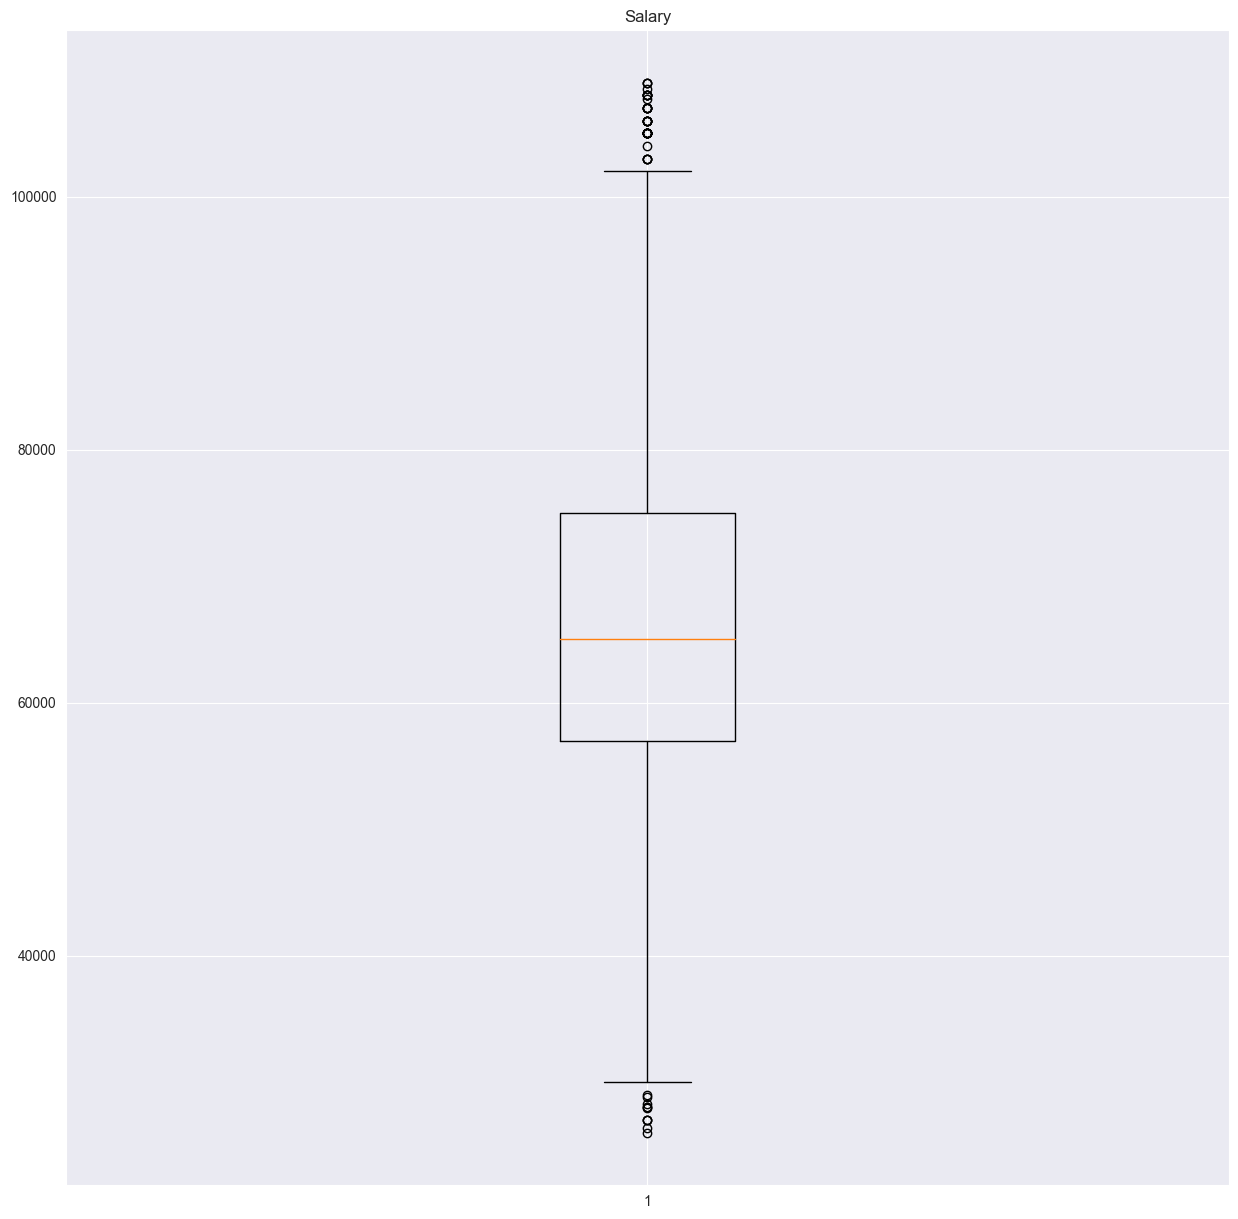

In [20]:
datas["Experience"]=pd.to_numeric(datas["Experience"], errors="coerce")
datas = datas.drop(datas[datas.Experience == 383].index)

datas["Salary"].fillna(value=0, inplace=True)
datas = datas.drop(datas[datas.Salary == 0].index)

datas["Salary"] = datas["Salary"].astype(int)
# datas["Seniority"] = datas["Seniority"].astype(int)

Q1 = datas['Salary'].quantile(0.25)
Q3 = datas['Salary'].quantile(0.75)
IQR = Q3 - Q1
filter = (datas['Salary'] >= Q1 - 1.5 * IQR) & (datas['Salary'] <= Q3 + 1.5 *IQR)
datas_filter1=datas.loc[filter]

plt.figure(figsize = (15, 15))
ax=plt.subplot(111)
ax.set_title("Salary")
plt.boxplot(datas_filter1['Salary'])


In [21]:
datas_filter1.describe()

,Year,Age,Experience,Salary
count,3440.000000,3195.000000,3399.000000,3440.000000
mean,2018.637500,32.085446,8.561871,66582.725291
std,1.309478,5.128275,4.800609,14960.221743
min,2016.000000,21.000000,0.000000,26000.000000
25%,2018.000000,29.000000,5.000000,57000.000000
50%,2019.000000,32.000000,8.000000,65000.000000
75%,2020.000000,35.000000,11.000000,75000.000000
max,2020.000000,66.000000,40.000000,109000.000000


Data Cleaning
---
----------------------

<AxesSubplot: >

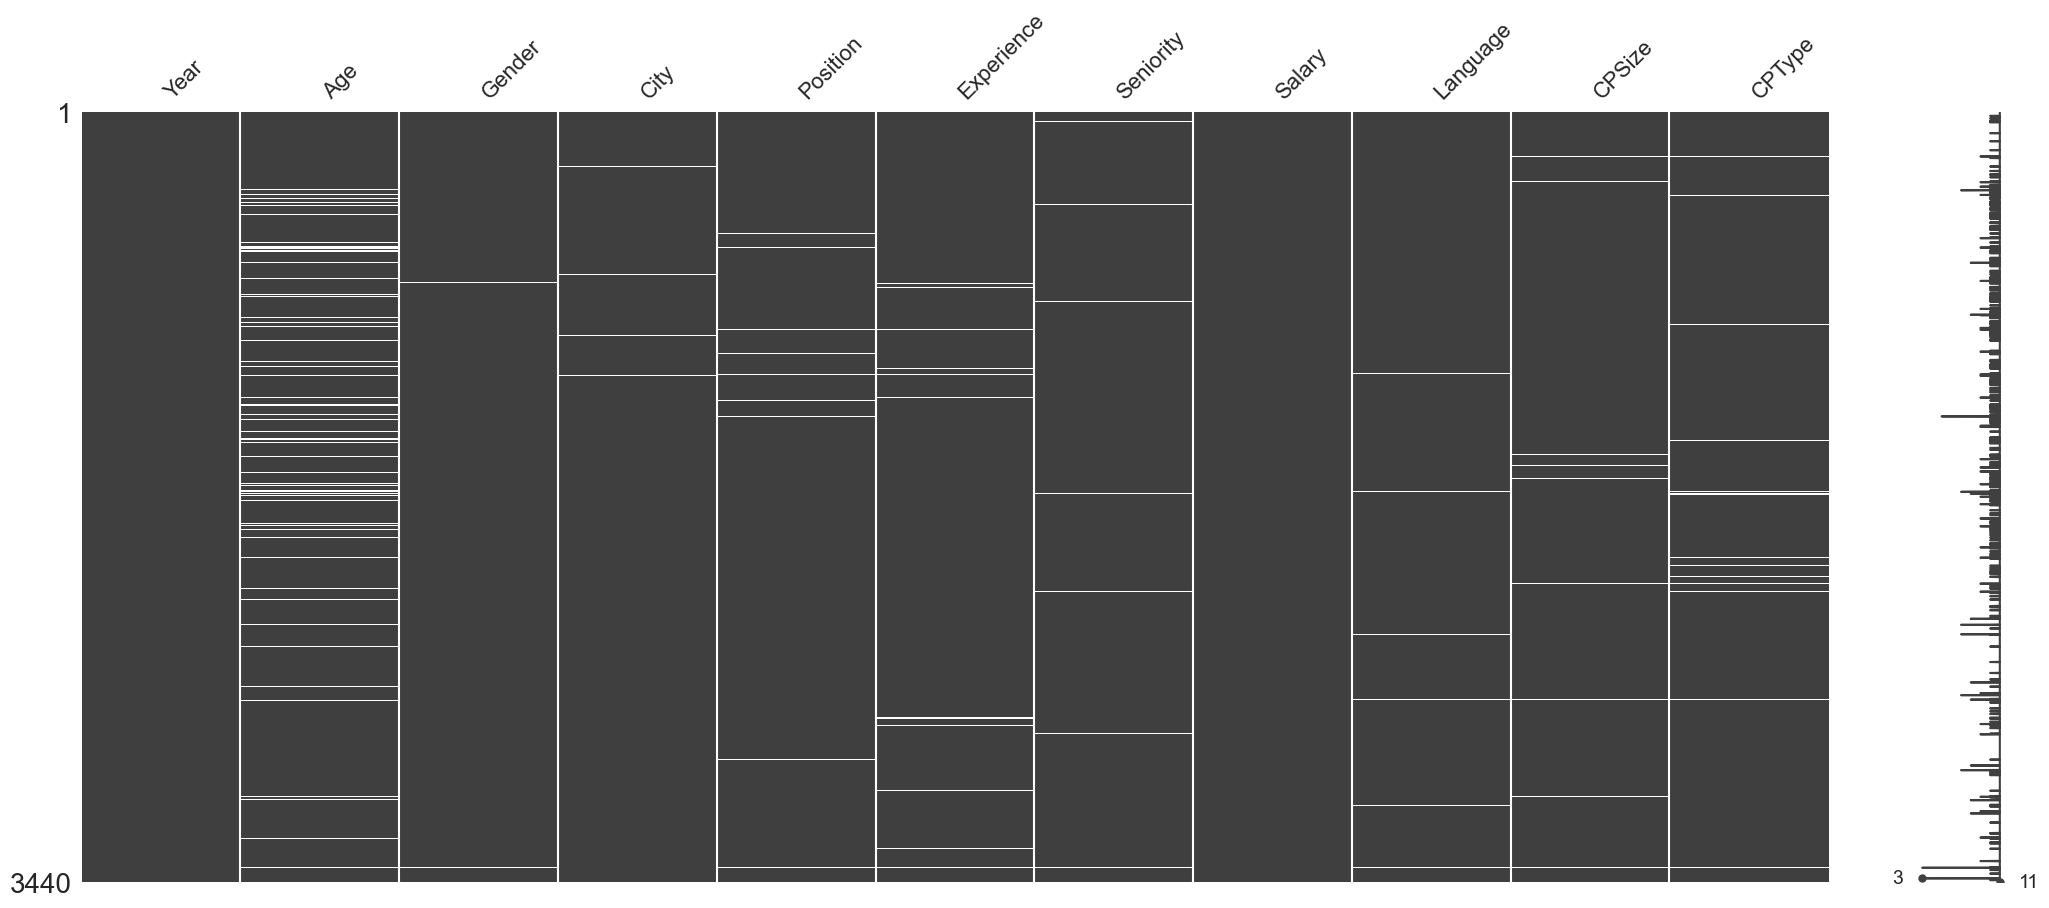

In [22]:
msno.matrix(datas_filter1)

C:\Users\abdur\AppData\Local\Temp\ipykernel_28324\4250904789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_filter1.fillna(value=0, inplace=True)


<AxesSubplot: >

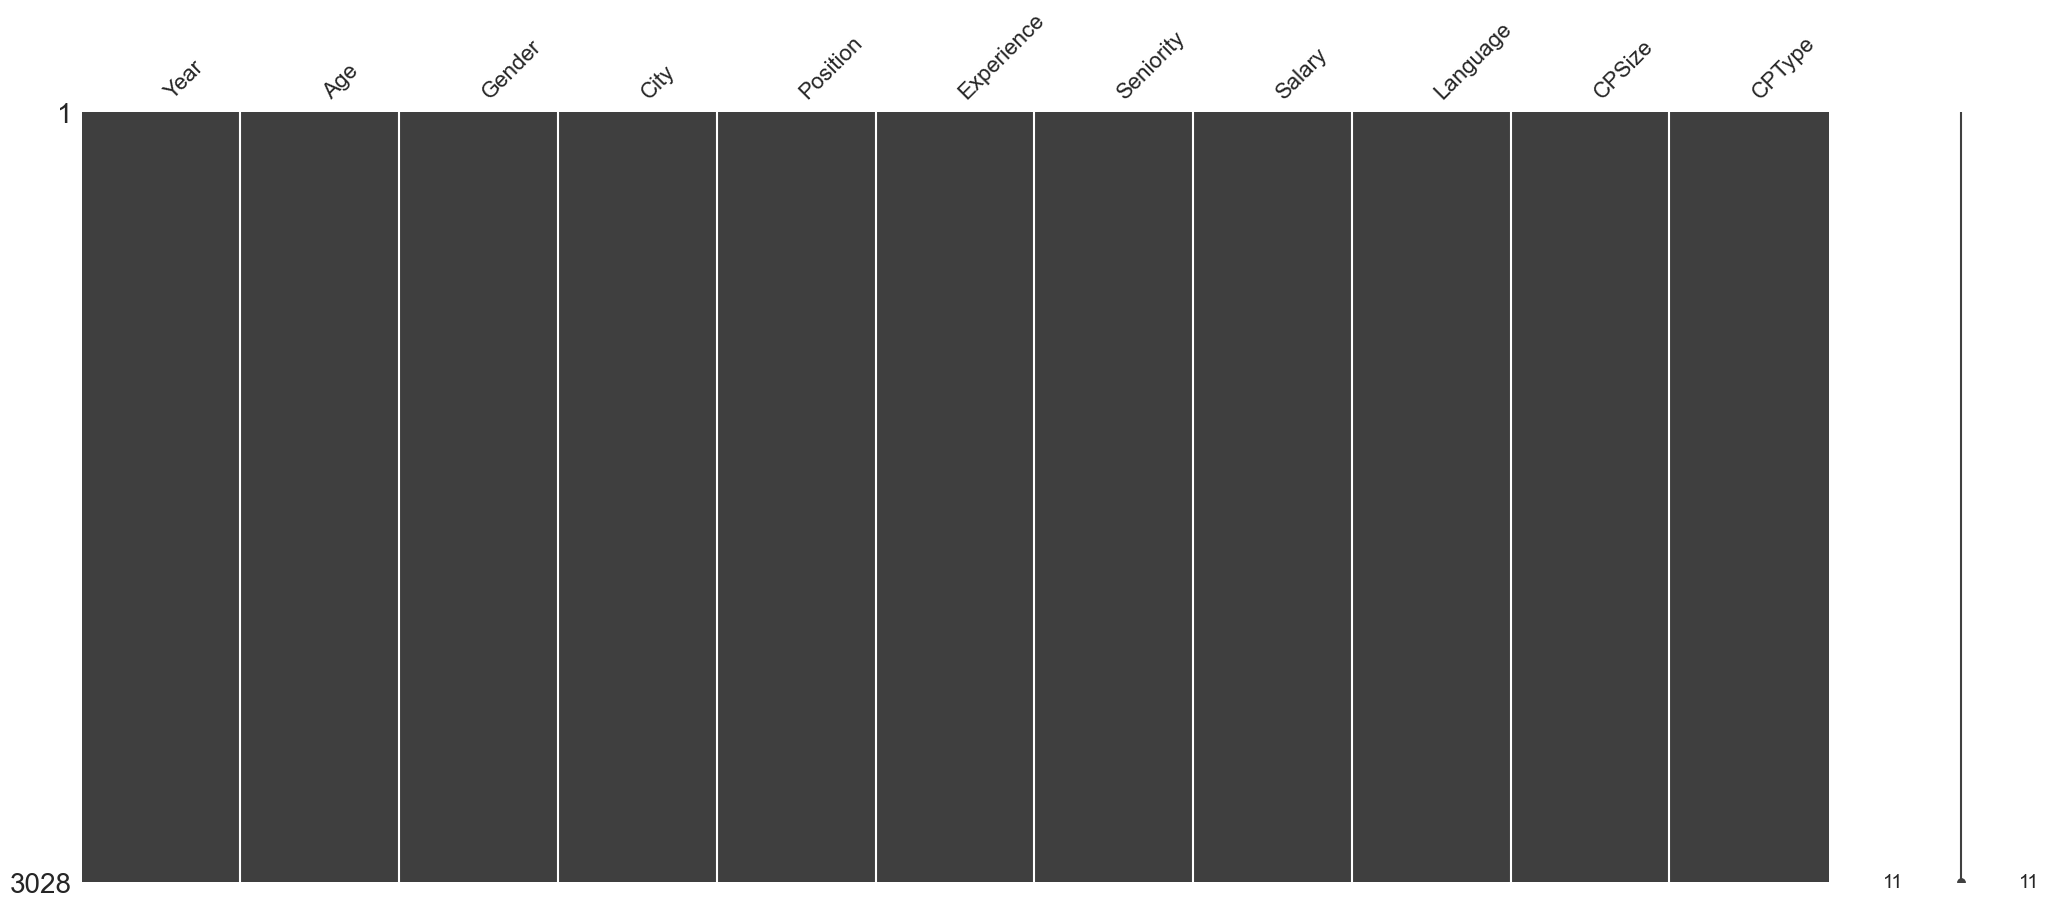

In [23]:
datas_filter1.fillna(value=0, inplace=True)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Age == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Gender == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.City == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Position == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Experience == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Seniority == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.Language == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.CPSize == 0].index)
datas_filter1 = datas_filter1.drop(datas_filter1[datas_filter1.CPType == 0].index)

msno.matrix(datas_filter1)

In [24]:
datas_filter1.describe()

,Year,Age,Experience,Salary
count,3028.000000,3028.000000,3028.000000,3028.000000
mean,2018.678996,32.063408,8.578203,66509.649934
std,1.326708,5.078239,4.740195,14760.727011
min,2016.000000,21.000000,0.500000,26000.000000
25%,2018.000000,29.000000,5.000000,57000.000000
50%,2019.000000,31.500000,8.000000,65000.000000
75%,2020.000000,35.000000,11.000000,75000.000000
max,2020.000000,66.000000,40.000000,109000.000000


Kalau bisa menghapus data yang inconsisten (other)

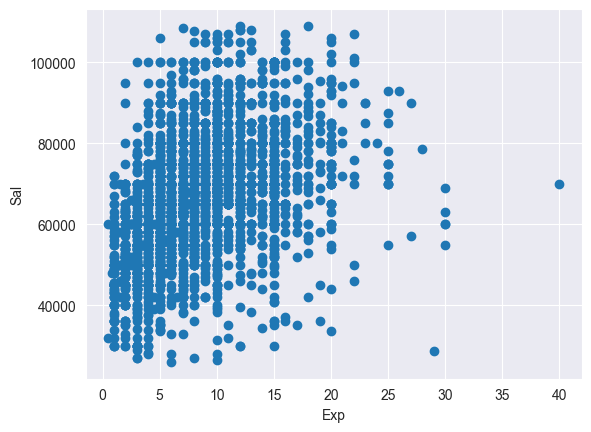

In [25]:
exp = datas_filter1["Experience"]
sal = datas_filter1["Salary"]
plt.xlabel("Exp")
plt.ylabel("Sal")
plt.scatter(exp,sal)

Gambaran Hubungan Tiap Kolom Dengan Salary
-

Year
-

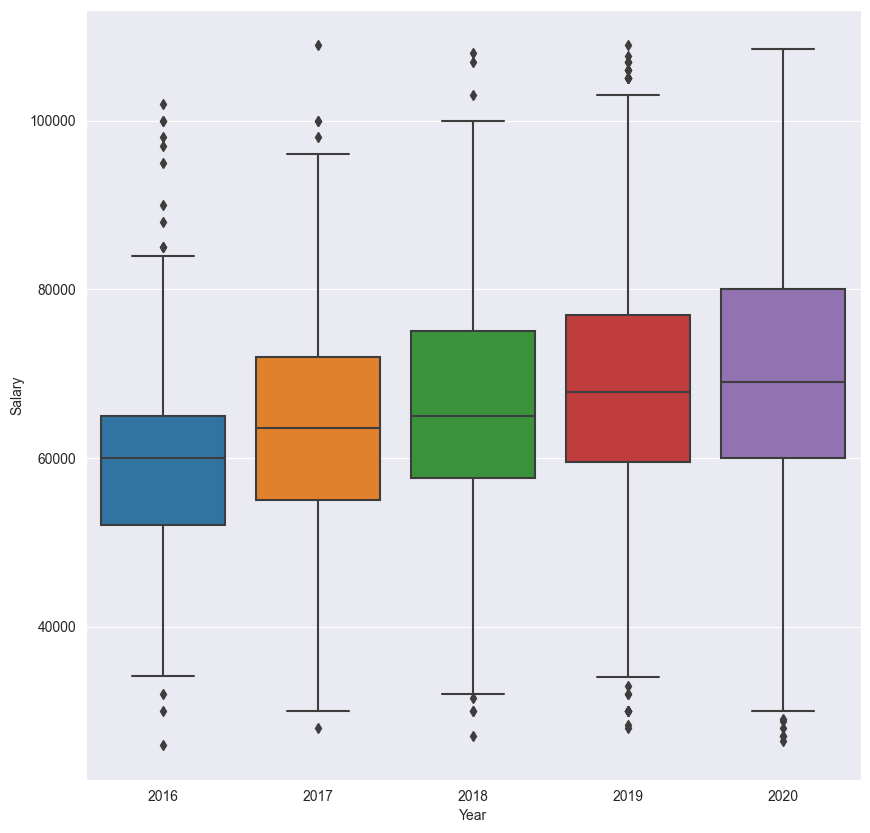

In [26]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Year", y="Salary", data=datas_filter1)
plt.show()

Experience
-

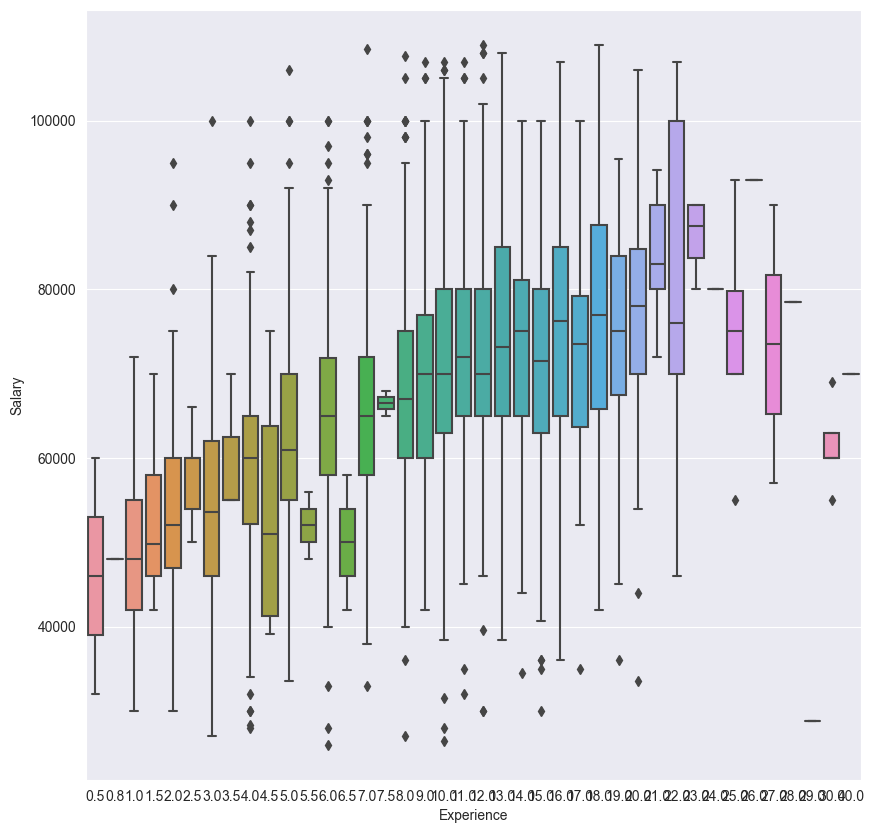

In [27]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Experience", y="Salary", data=datas_filter1)
plt.show()

Age
-

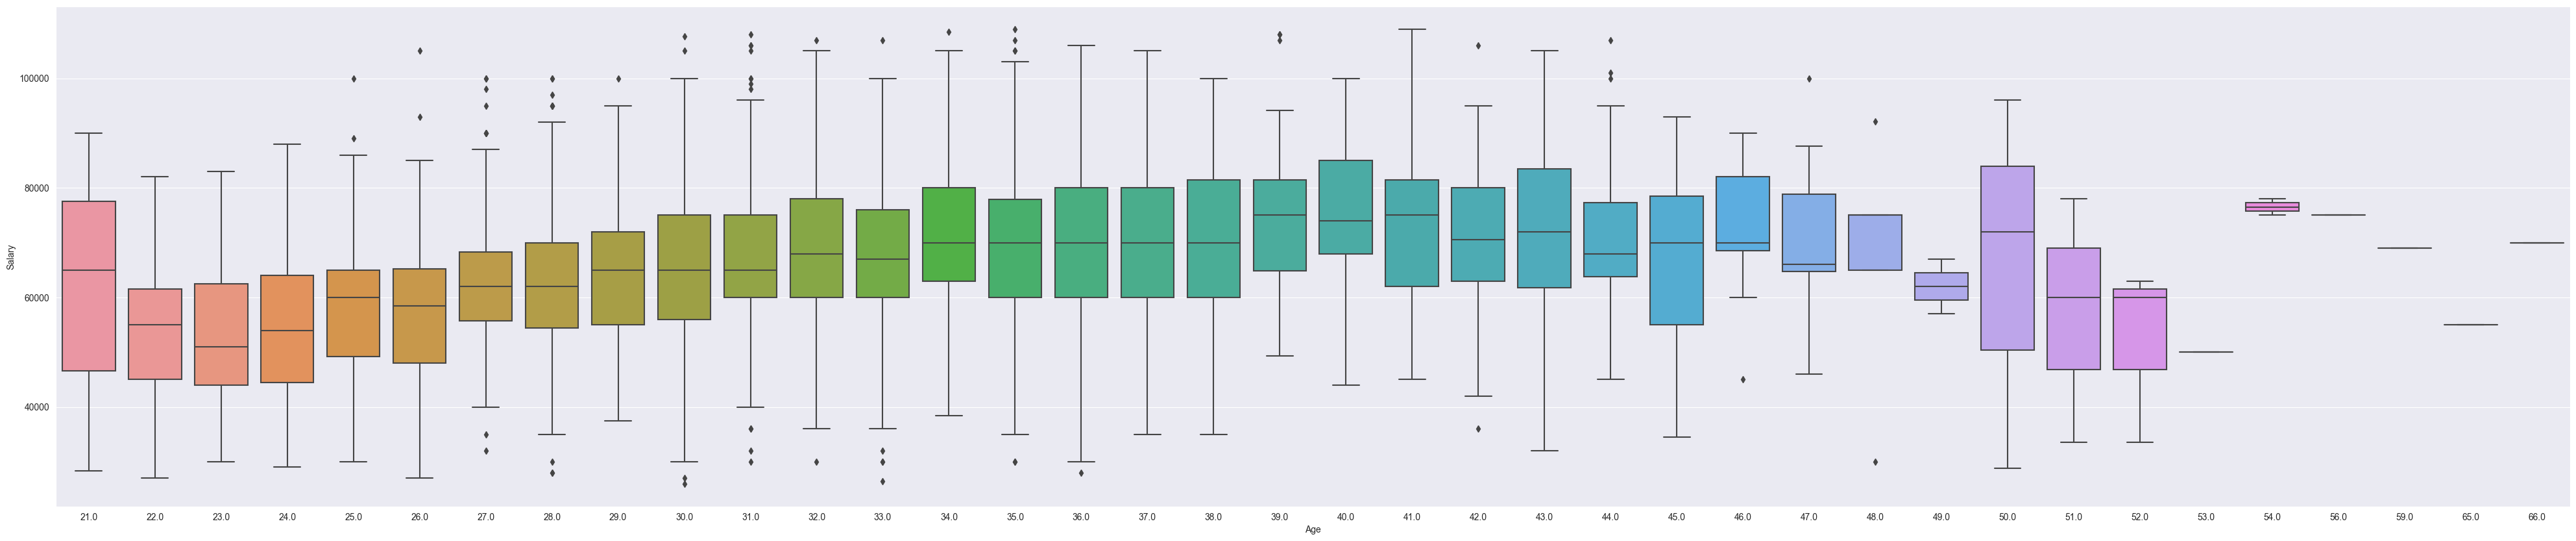

In [28]:
fig = plt.figure(figsize=(50,10)) 
sns.boxplot(x="Age", y="Salary", data=datas_filter1)
plt.show()

Gender
-

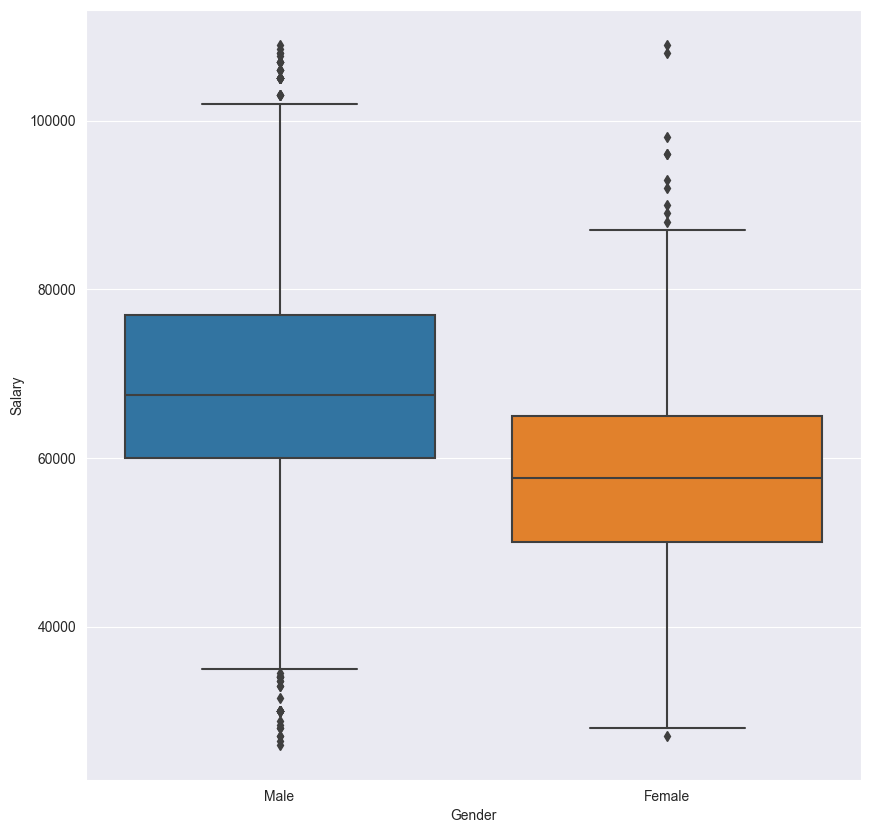

In [29]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Gender", y="Salary", data=datas_filter1)
plt.show()

City
-

In [30]:
fig = plt.figure(figsize=(200,100)) 
sns.boxplot(x="City", y="Salary", data=datas_filter1)
plt.show()

Position
-

In [31]:
fig = plt.figure(figsize=(300,100)) 
sns.boxplot(x="Position", y="Salary", data=datas_filter1)
plt.show()

Seniority
-

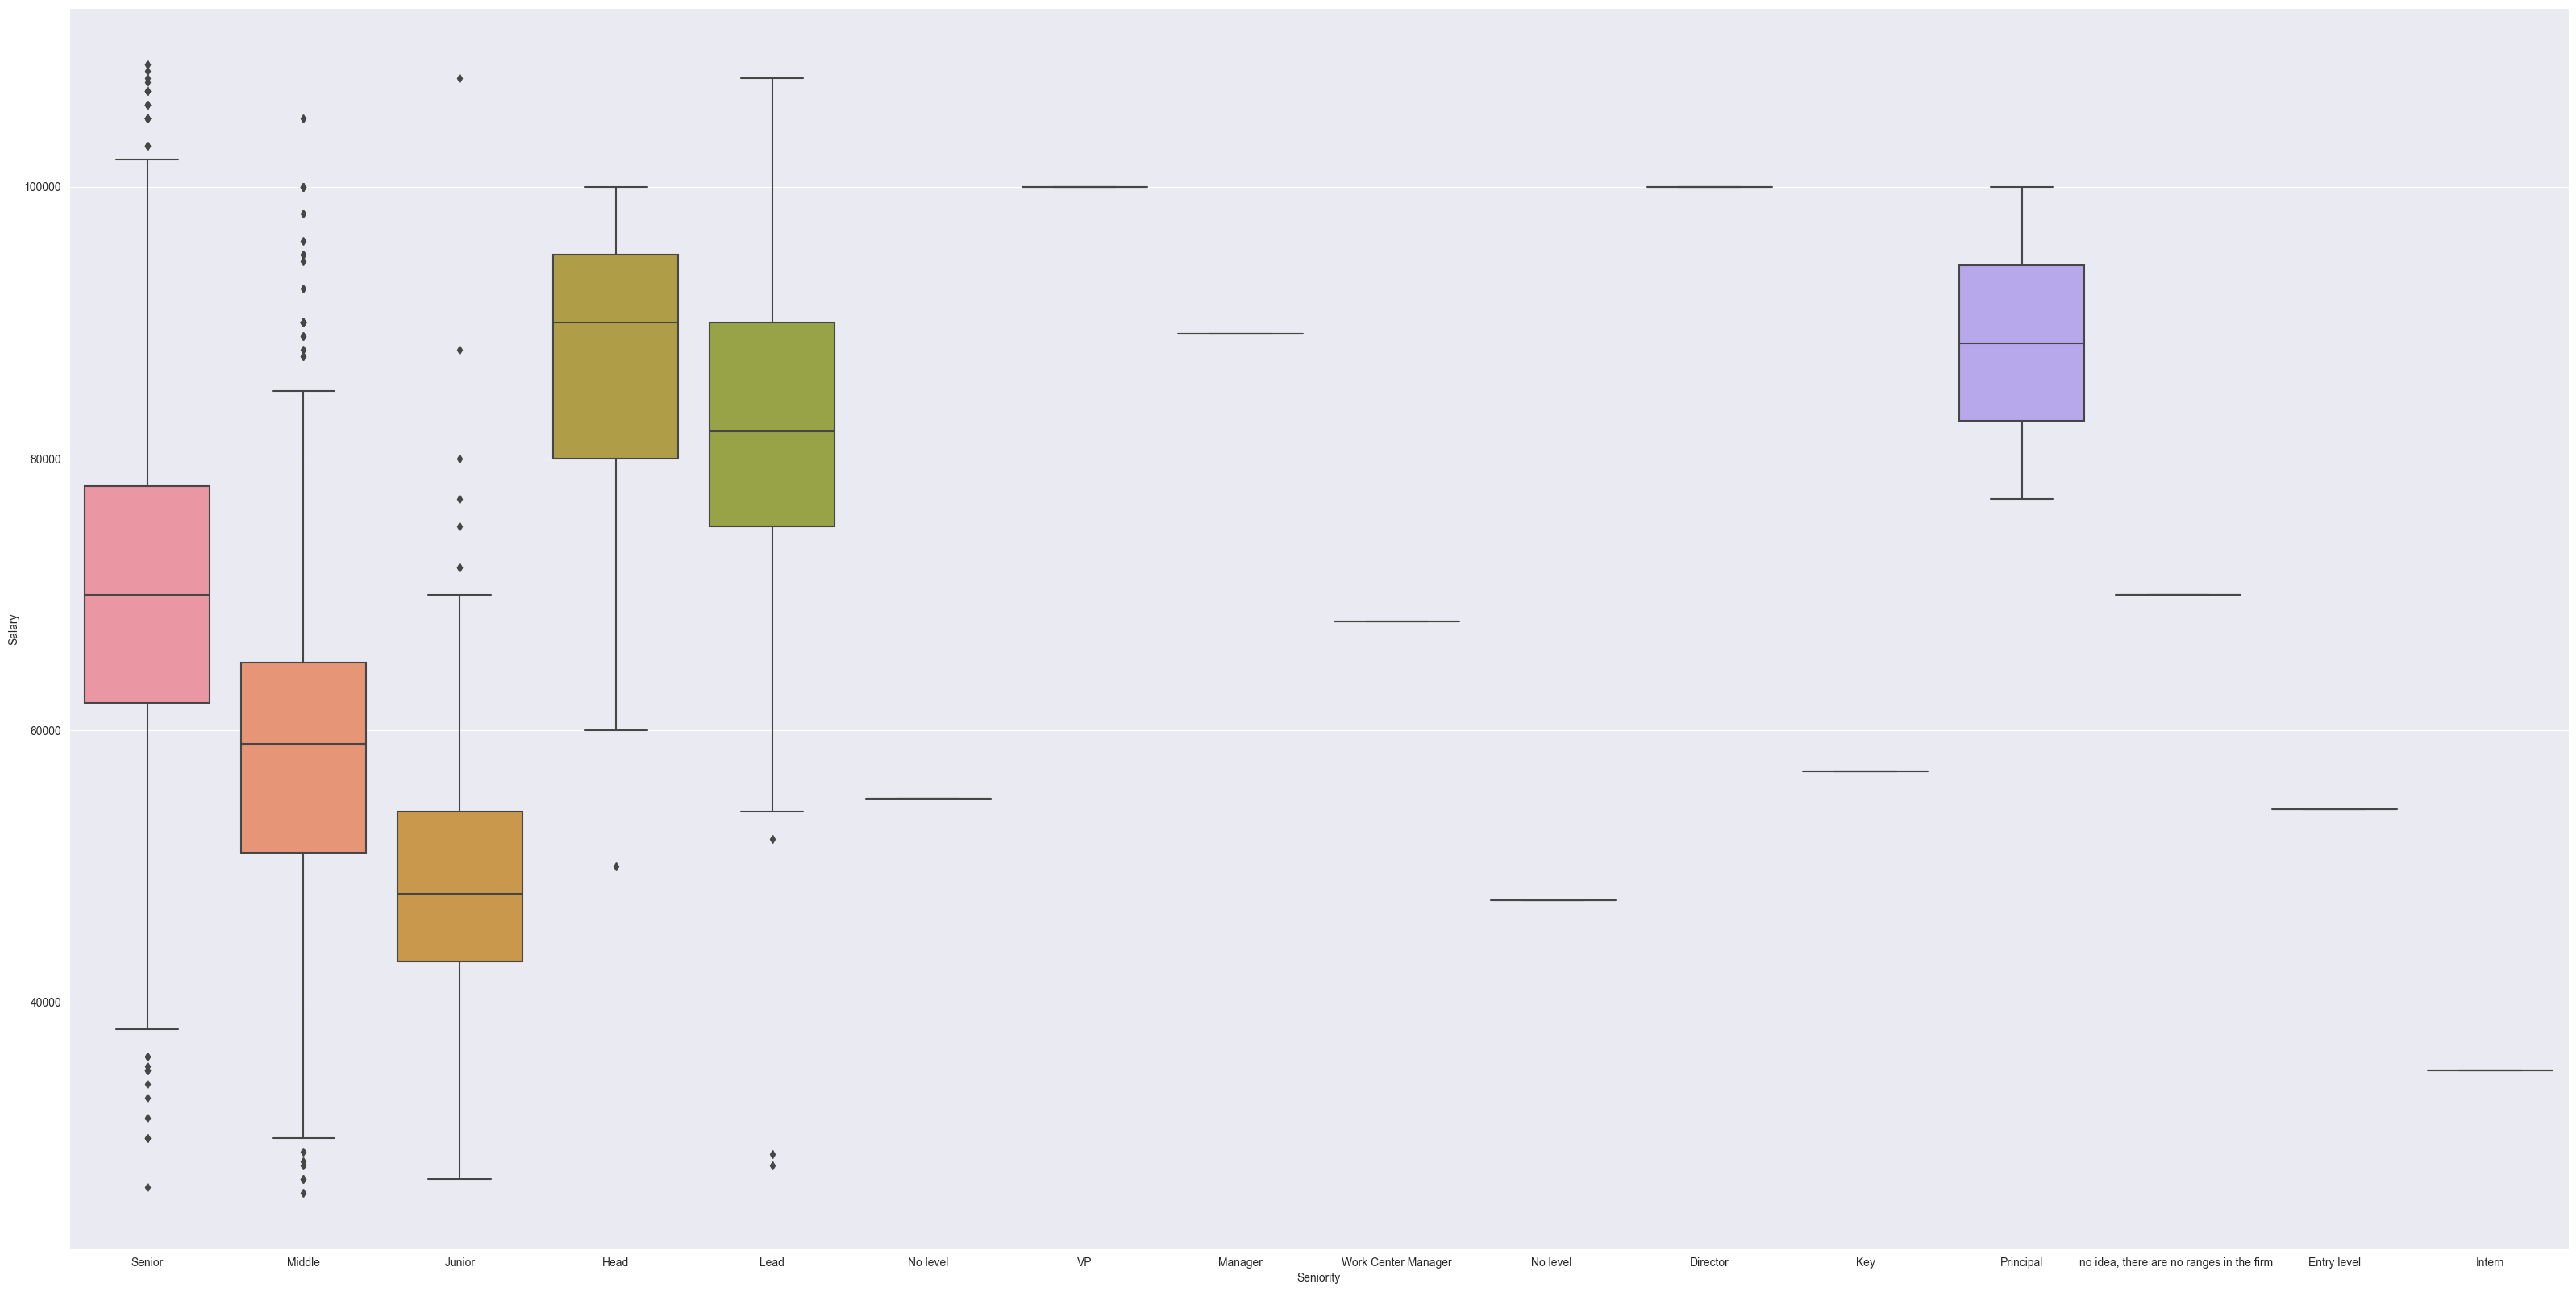

In [32]:
fig = plt.figure(figsize=(40,20)) 
sns.boxplot(x="Seniority", y="Salary", data=datas_filter1)
plt.show()

Language
-

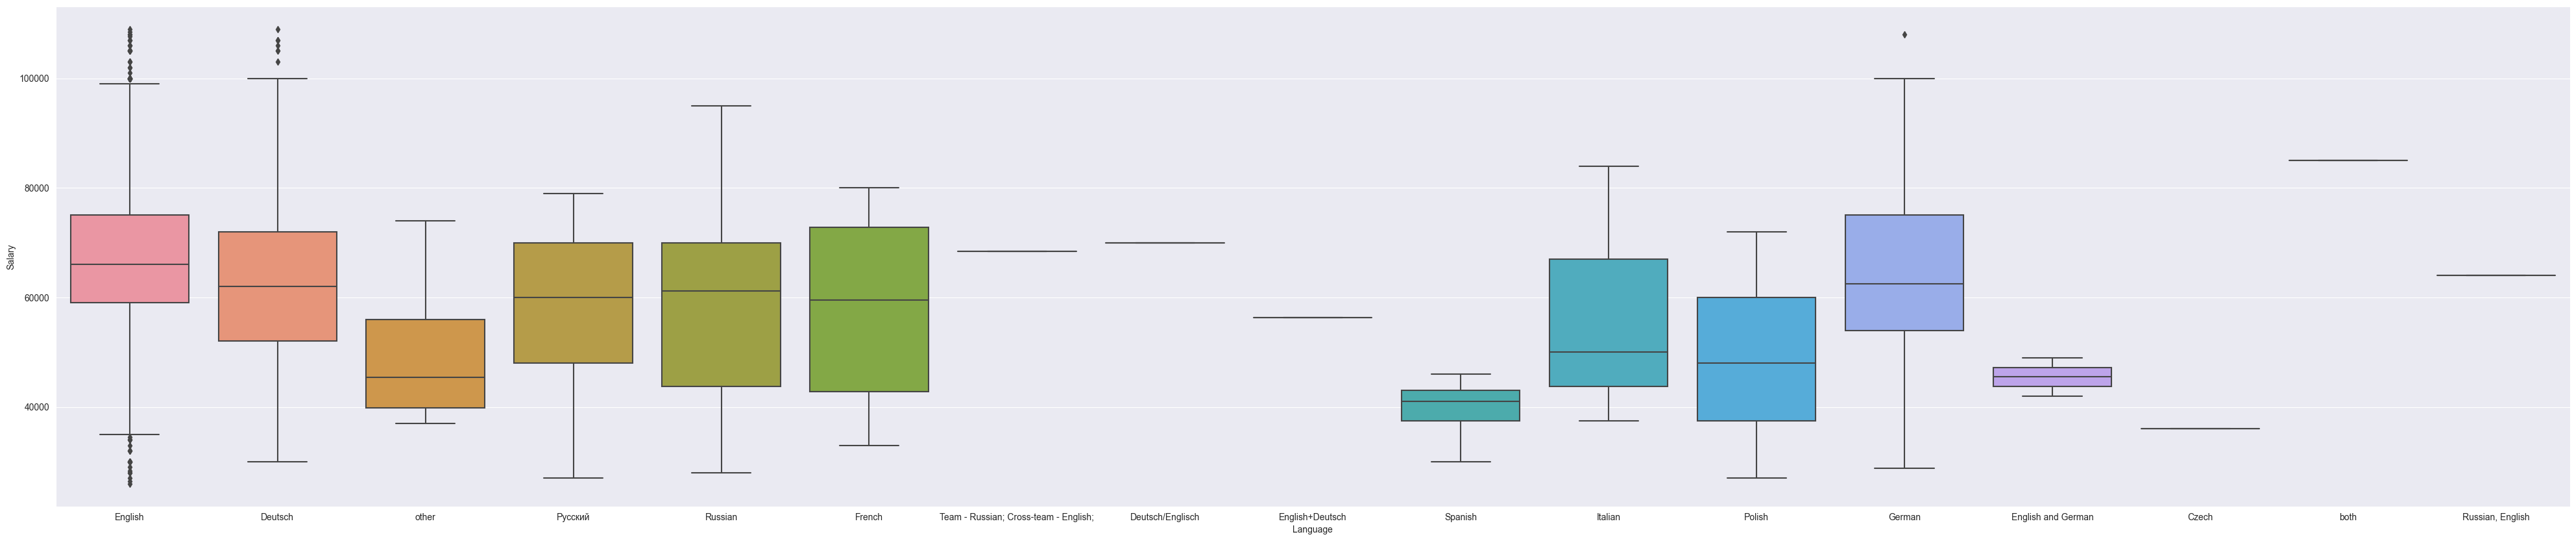

In [33]:
fig = plt.figure(figsize=(50,10)) 
sns.boxplot(x="Language", y="Salary", data=datas_filter1)
plt.show()

CP Size
-

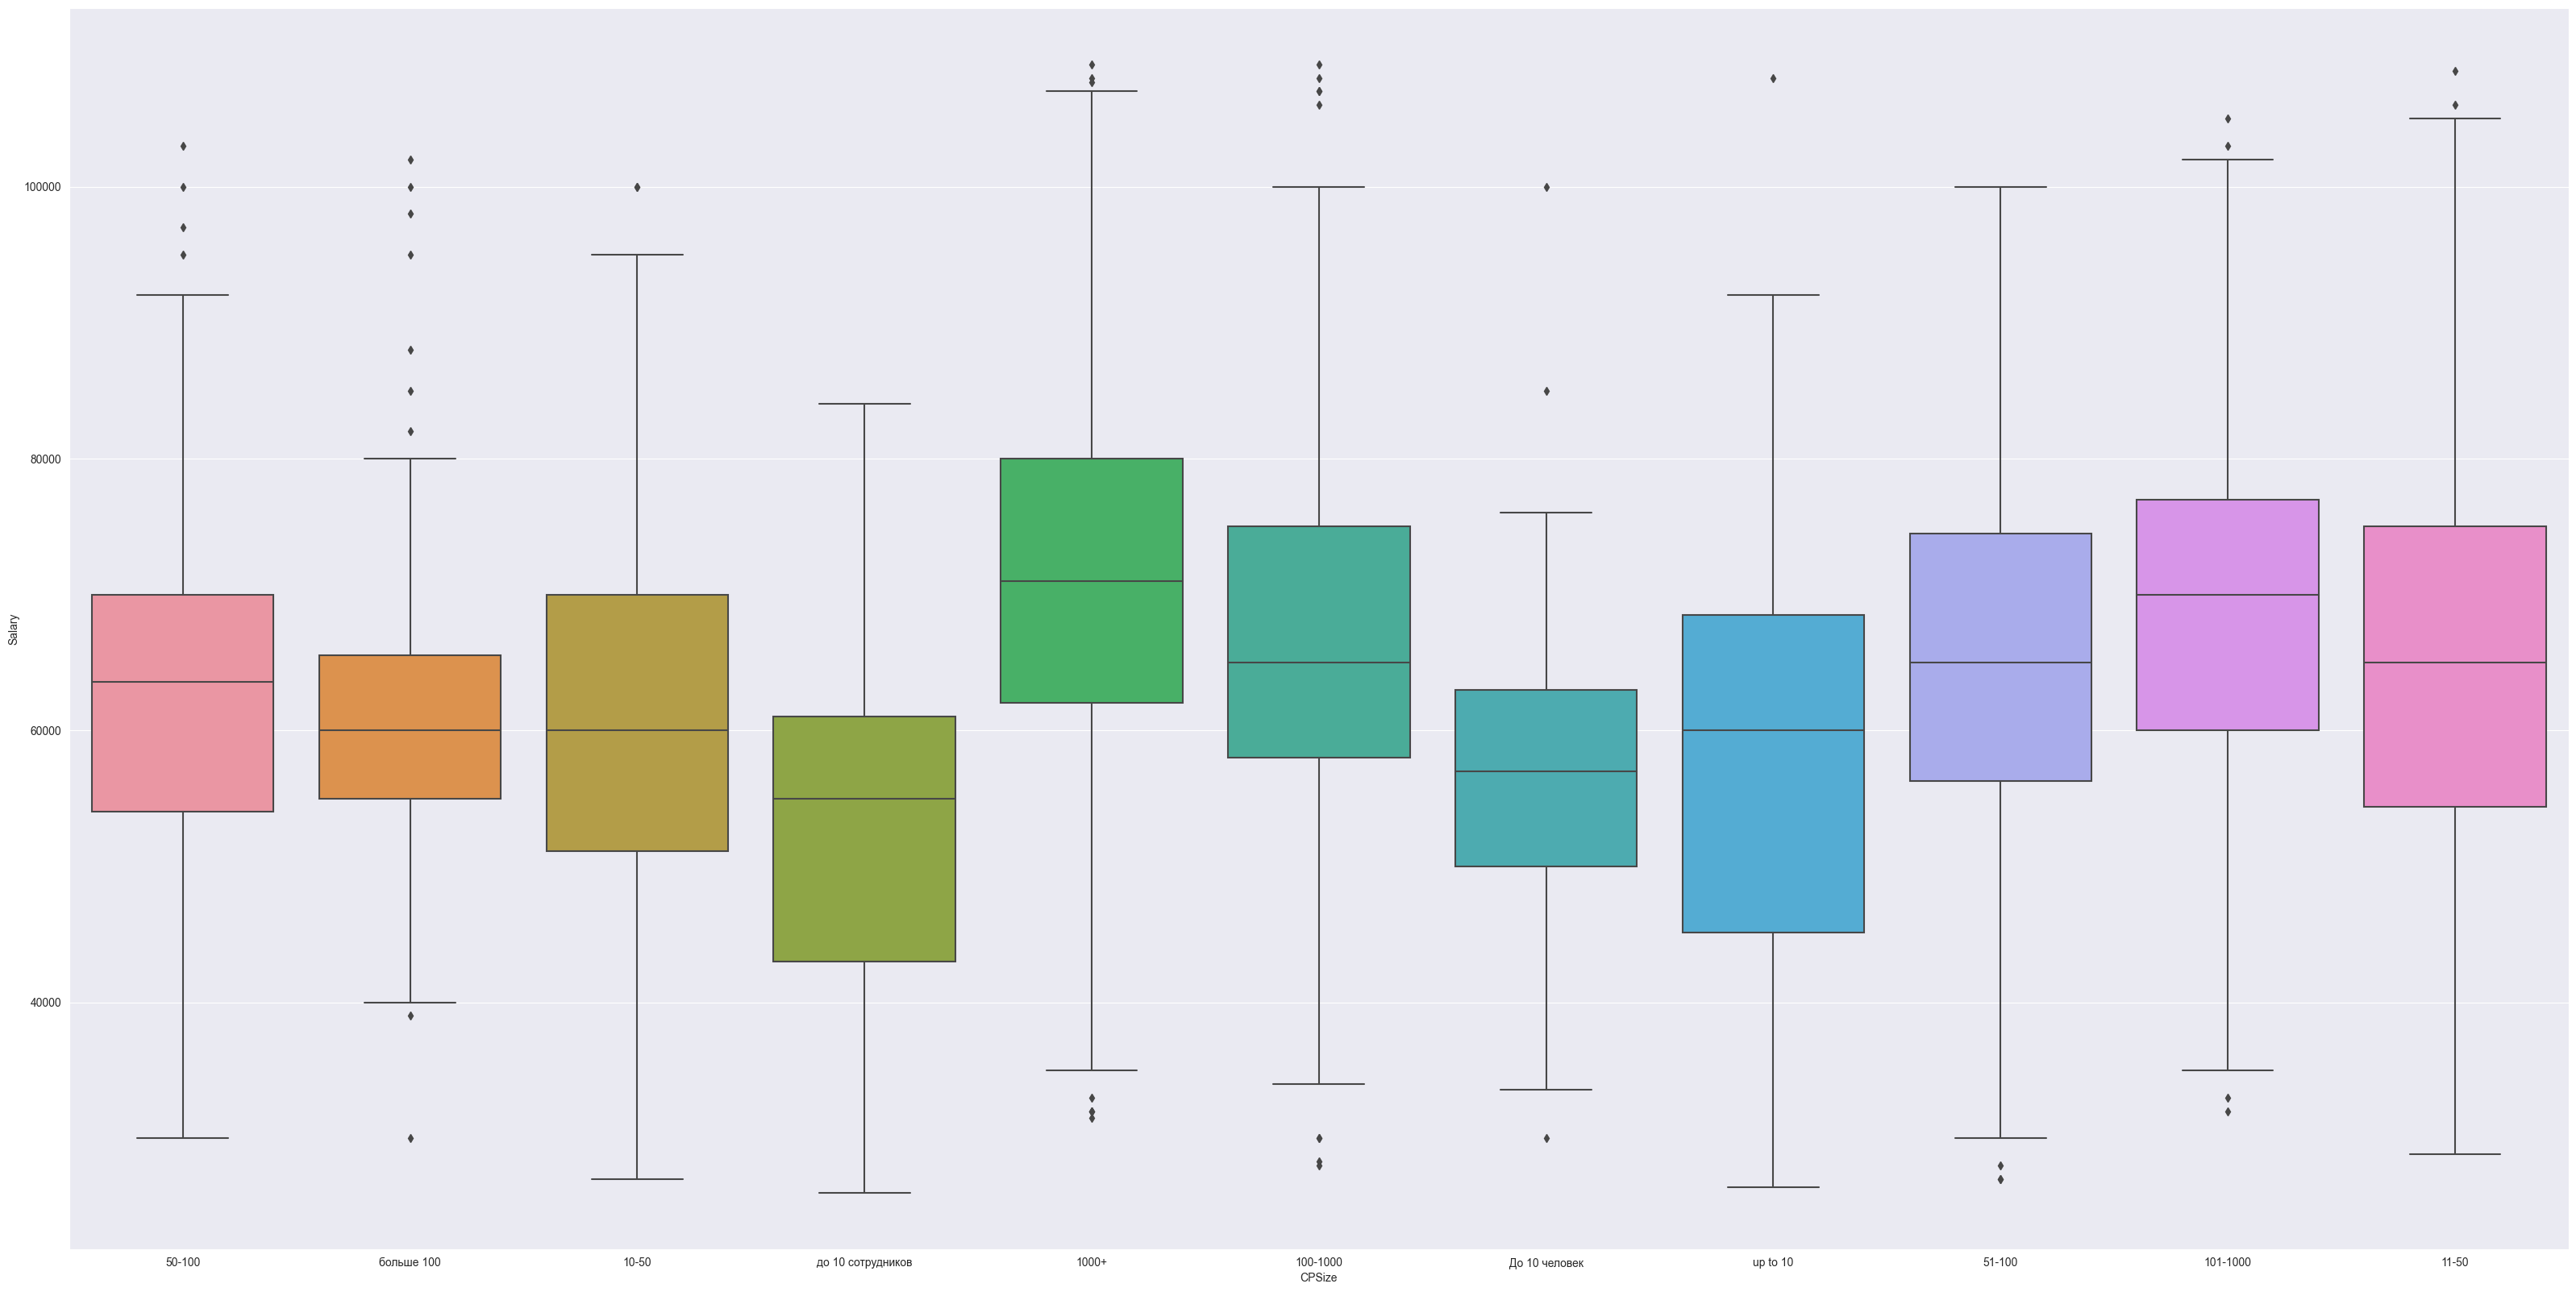

In [34]:
fig = plt.figure(figsize=(40,20)) 
sns.boxplot(x="CPSize", y="Salary", data=datas_filter1)
plt.show()

CP Type
-

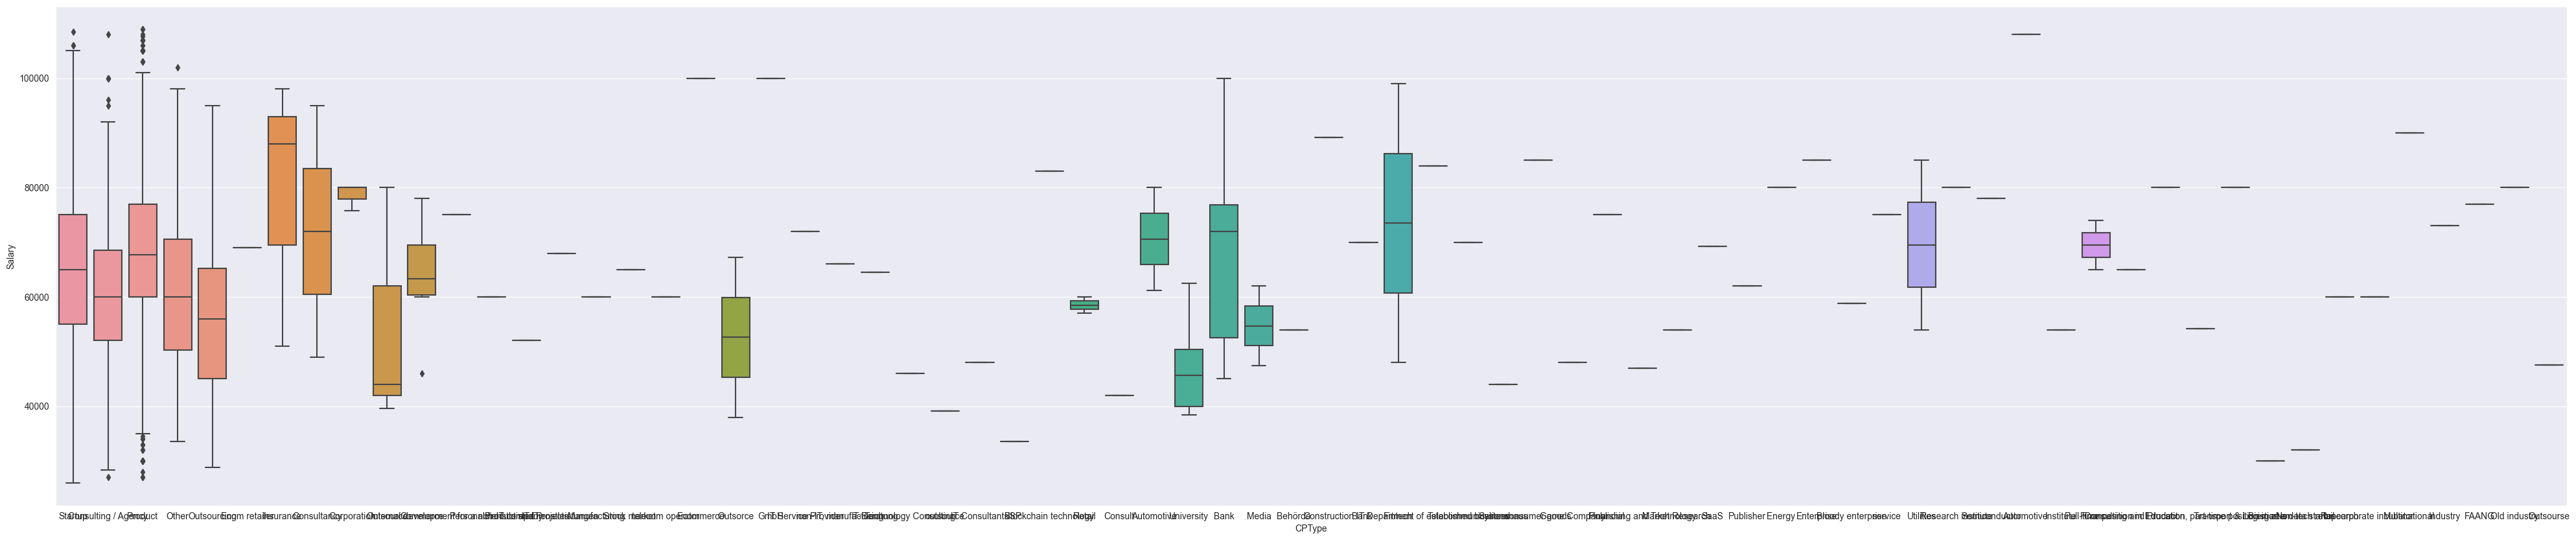

In [35]:
fig = plt.figure(figsize=(50,10)) 
sns.boxplot(x="CPType", y="Salary", data=datas_filter1)
plt.show()

Numerifikasi Data Kategorial
---
------------------------------------

Seniority
-
0 = Junior

1 = Middle

2 = Senior

3 = Lead

4 = Head / Principal


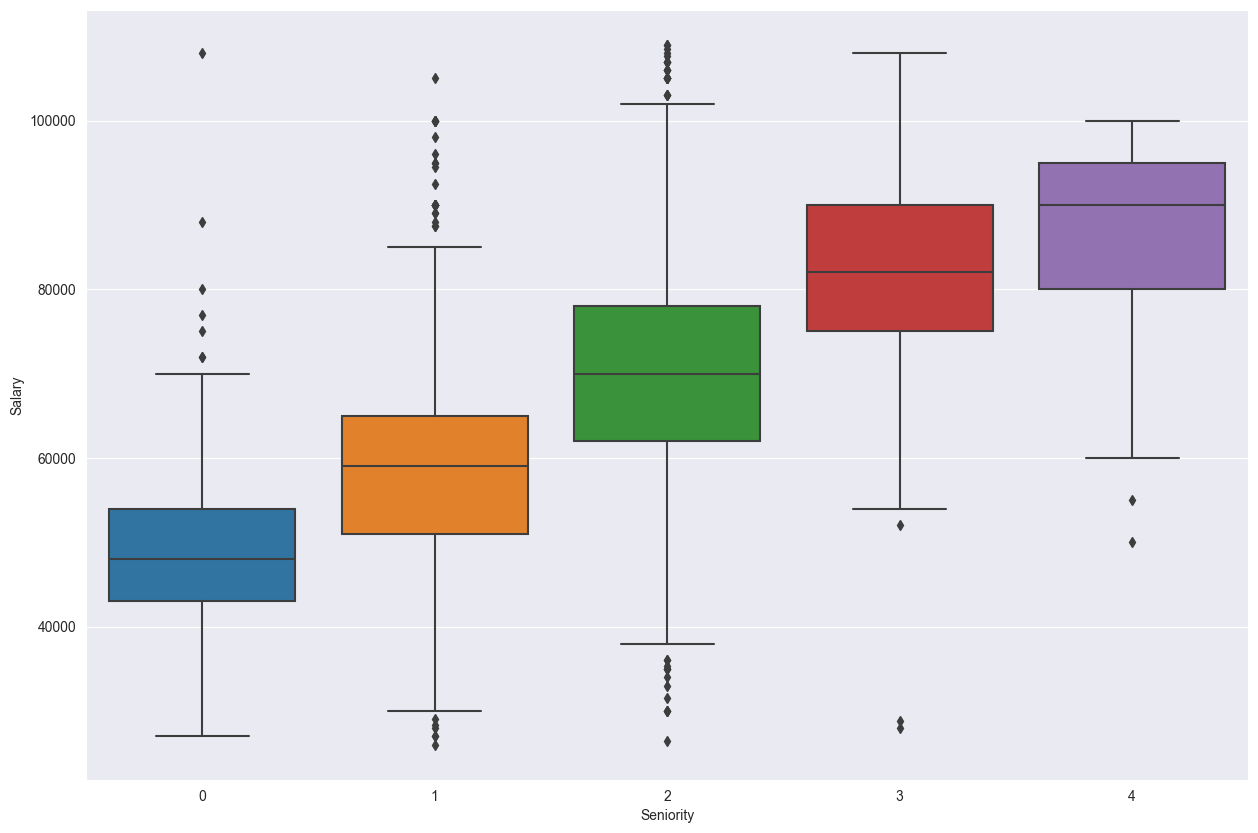

In [36]:
datas_filter1['Seniority'] = pd.factorize(datas_filter1.Seniority)[0]
datas_filter1['Seniority'].replace([12,3,0,2],[5,5,3,0],inplace=True)
datas_filter1['Seniority'].replace([3,4,5],[2,3,4],inplace=True)

index_Senior = datas_filter1[datas_filter1['Seniority'] > 4].index
datas_filter1 = datas_filter1.drop(index_Senior)

fig = plt.figure(figsize=(15,10)) 
sns.boxplot(x="Seniority", y="Salary", data=datas_filter1)
plt.show()

CPSize
-
0 = 1 - 10 employees

1 = 11 - 50 employees

2 = 51 - 100 employess

3 = 101 - 1000 employees

4 = 1000+ employees

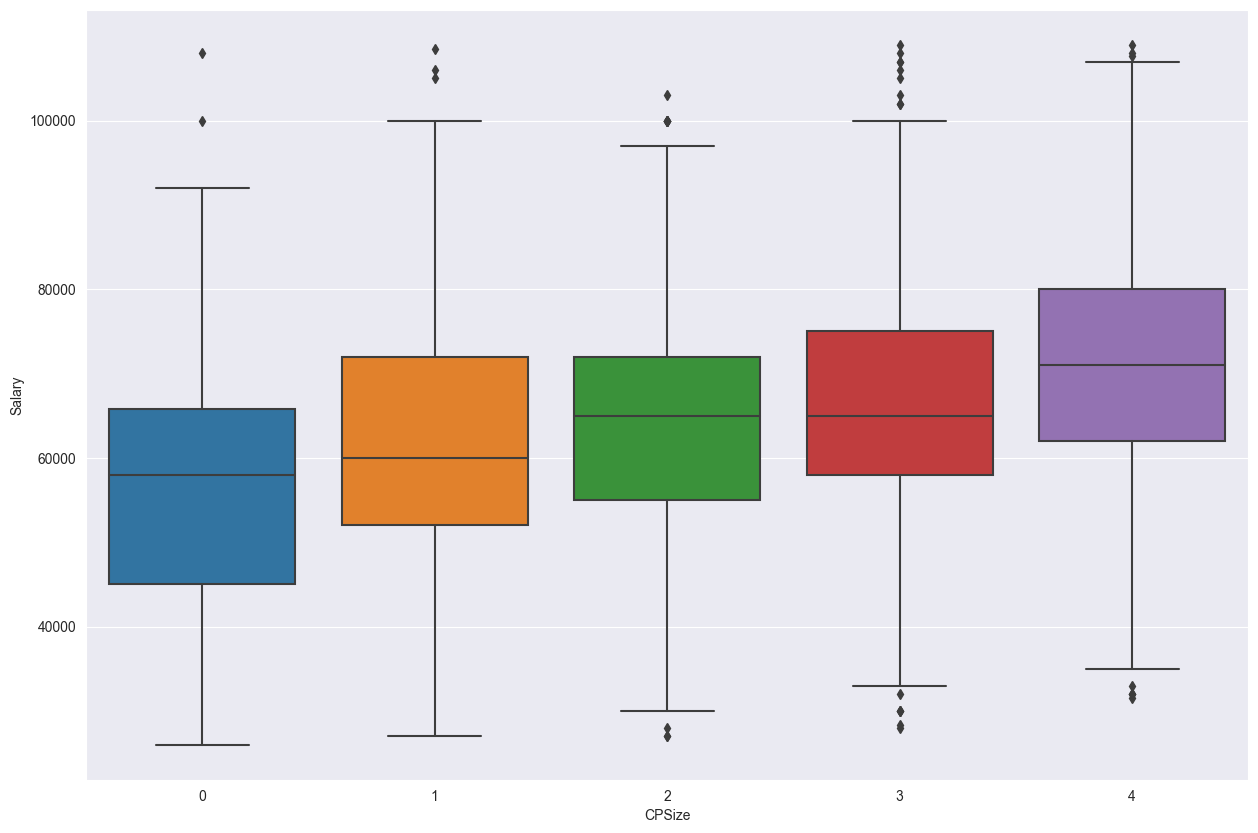

In [37]:
datas_filter1['CPSize'] = pd.factorize(datas_filter1.CPSize)[0]
datas_filter1['CPSize'].replace([0,1,2,3,4,5,6,7,8,9,10],[13,14,12,11,15,14,11,11,13,14,12],inplace=True)
datas_filter1['CPSize'].replace([11,12,13,14,15],[0,1,2,3,4],inplace=True)
fig = plt.figure(figsize=(15,10)) 
sns.boxplot(x="CPSize", y="Salary", data=datas_filter1)
plt.show()

Gender
-
0 = Male

1 = Female

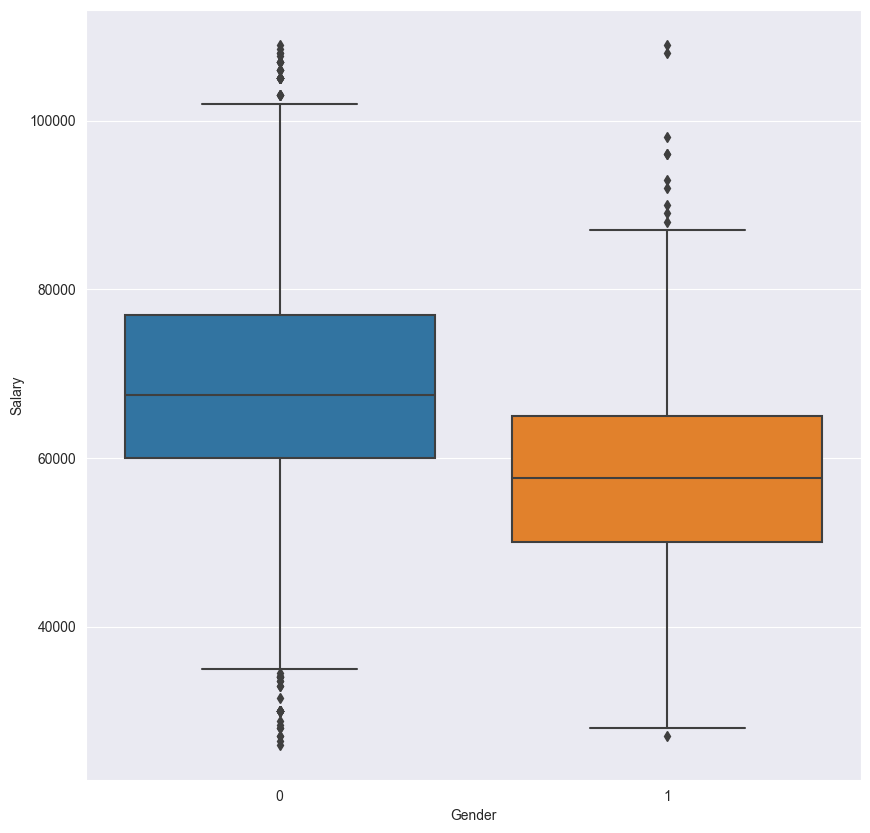

In [38]:
datas_filter1['Gender'] = pd.factorize(datas_filter1.Gender)[0]
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Gender", y="Salary", data=datas_filter1)
plt.show()

Language
-
0 = English

1 = Deutsch

2 = Russian

3 = French

4 = Spanish

5 = Italian

6 = Polish

7 = German

8 = English & German

9 = Others

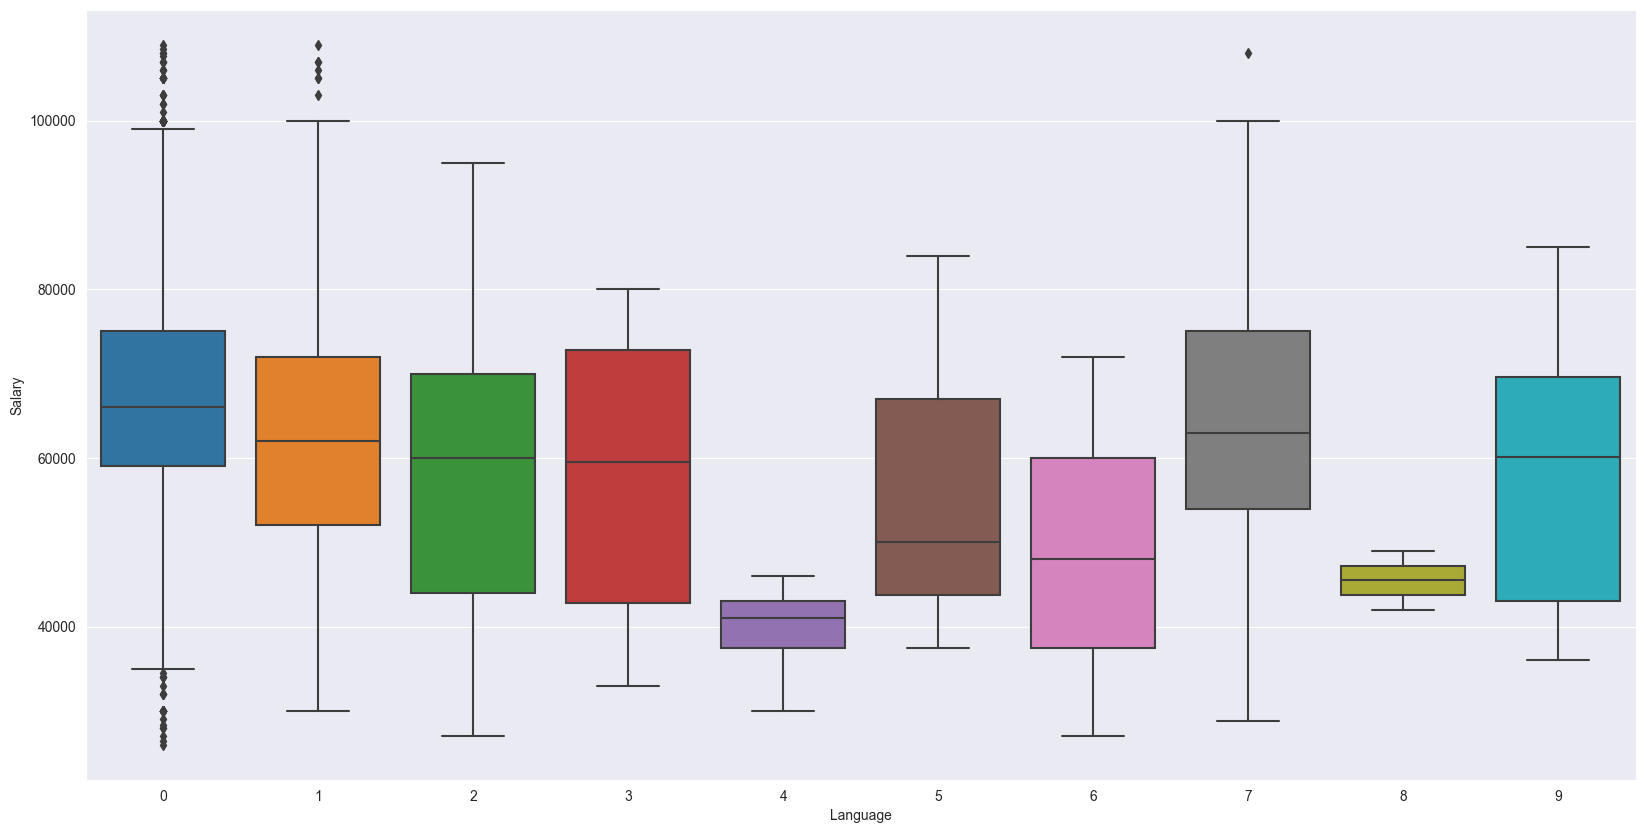

In [39]:
datas_filter1['Language'] = pd.factorize(datas_filter1.Language)[0]
datas_filter1['Language'].replace([6,7,8,2,14,15,16,4],[100,100,100,100,100,100,100,3],inplace=True)
datas_filter1['Language'].replace([3,4,5,9,10,11,12,13,100],[2,2,3,4,5,6,7,8,9],inplace=True)
fig = plt.figure(figsize=(20,10)) 
sns.boxplot(x="Language", y="Salary", data=datas_filter1)
plt.show()

Describe Dataset
-

In [40]:
datas_filter1.describe()

,Year,Age,Gender,Experience,Seniority,Salary,Language,CPSize
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000
mean,2018.675058,32.056641,0.149718,8.575621,1.656840,66502.265982,0.584631,2.729712
std,1.326719,5.065028,0.356854,4.733663,0.718146,14733.670407,1.705168,1.140473
min,2016.000000,21.000000,0.000000,0.500000,0.000000,26000.000000,0.000000,0.000000
25%,2018.000000,29.000000,0.000000,5.000000,1.000000,57000.000000,0.000000,2.000000
50%,2019.000000,31.000000,0.000000,8.000000,2.000000,65000.000000,0.000000,3.000000
75%,2020.000000,35.000000,0.000000,11.000000,2.000000,75000.000000,0.000000,4.000000
max,2020.000000,66.000000,1.000000,40.000000,4.000000,109000.000000,9.000000,4.000000


In [41]:
datas_filter1.head(5)

,Year,Age,Gender,City,Position,Experience,Seniority,Salary,Language,CPSize,CPType
0,2016,29.0,0,Berlin,Fullstack Ruby Developer,6.0,2,54000,0,2,Startup
1,2016,31.0,0,Frankfurt,Developer,12.0,2,62000,1,3,Consulting / Agency
2,2016,30.0,0,Berlin,Frontend Engineer,4.0,2,65000,0,3,Product
3,2016,33.0,0,Berlin,Tech Lead,12.0,2,60000,0,3,Product
4,2016,27.0,0,Berlin,Python Developer,5.0,1,54000,0,1,Startup


Korelasi tiap kolom
-----------------------------

C:\Users\abdur\AppData\Local\Temp\ipykernel_28324\240966456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datas_filter1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)


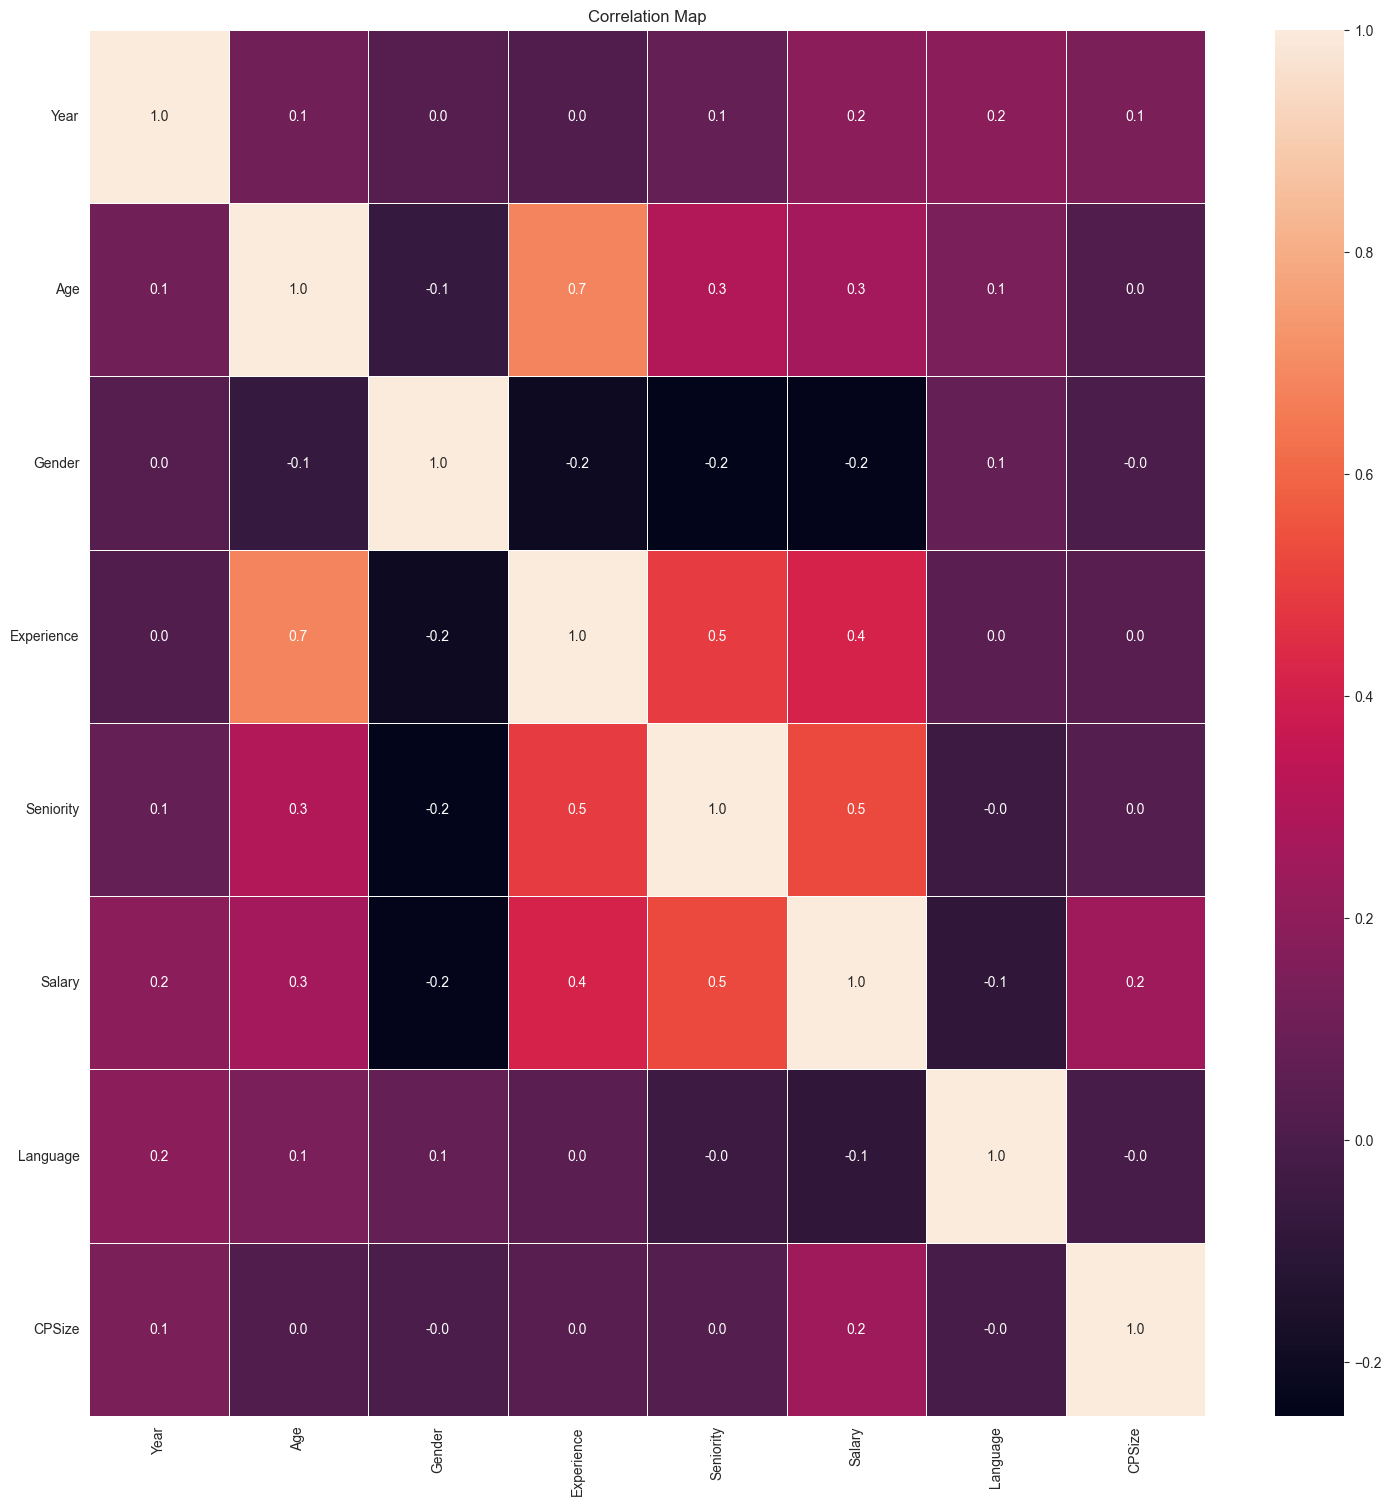

In [42]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(datas_filter1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()